In [1]:
from DataAnalysisCommon import *

In [2]:
ExactT, Exactm, ExactT2, ExactC = Calculate_Onsager_Exact()

In [3]:
# Figure 1: Naive Calculation and Exact soiution
def Fig1a2():
    Data, MM, CC = [None]*4, [None]*4, [None]*4
    Data[0] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_2_int40_1.csv")
    Data[1] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_3_int40_1.csv")
    Data[2] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_4_int40_1.csv")
    Data[3] = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_5_int40_1.csv")

    Label = ["L2","L3","L4","L5"]
    Marker = ['o','v','^','s']

    TT = Data[0].iloc[:,1].values

    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.plot(ExactT,Exactm, color='black',linestyle='-.')

    for i in range(4):
        plt.plot(TT,Data[i].iloc[:,2].values,label=Label[i], marker=Marker[i], markersize=5)

    plt.ylim(0,1.05)
    plt.xlim(0,5)
    plt.text(2.27, -0.05, '$T_c$', ha='center')

    plt.ylabel('magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.legend()
    plt.show()

    #Fig 2,
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.plot(ExactT2,ExactC, color='black',linestyle='-.')

    for i in range(4):
        plt.plot(TT,Data[i].iloc[:,3].values,label=Label[i], marker=Marker[i], markersize=5)

    plt.ylim(-0.1,2)
    plt.xlim(0,5)
    plt.text(2.27, -0.2, '$T_c$', ha='center')

    plt.ylabel('Specific heat c')
    plt.xlabel('Temperature T')
    plt.legend()
    plt.show()

In [4]:
# Fig1a2()

In [5]:
def Binder_plot(num, path1, path2, Llist,temp_range=[2.2,2.35]):
    Data = [pd.read_csv(path1 + str(i) + path2 + ".csv") for i in Llist]
    Lname = ["L" + str(lattice) for lattice in Llist]
    marker = ["o","s","v","^","8"] * 2
    T2 = Data[0].iloc[:,1].values
    Binder = [0.5*(3-datum.iloc[:,6].values/(datum.iloc[:,5].values)**2) for datum in Data]

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    plt.xlim(temp_range[0],temp_range[1])
    for i in range(num):
        plt.plot(T2,Binder[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    T22 = T2-2/np.log(1+np.sqrt(2))
    for i in range(num):
        plt.plot(T22*Llist[i],Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()
    plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('$L^{1/\\nu}(T-T_c)$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

In [6]:
def Binder_plot2(num, path1, path2, Llist,Tc=1,nu=1):
    Data = [pd.read_csv(path1 + str(i) + path2 + ".csv") for i in Llist]
    Lname = ["L" + str(lattice) for lattice in Llist]
    marker = ["o","s","v","^","8"] * 2
    T2 = []
    for i in range(num):
        T2.append(Data[i].iloc[:,1].values)
    T2 = np.array(T2)
    Binder = [0.5*(3-datum.iloc[:,6].values/(datum.iloc[:,5].values)**2) for datum in Data]

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0,1)
    # plt.xlim(temp_range[0],temp_range[1])
    for i in range(num):
        plt.plot(T2[i],Binder[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    # plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num):
        plt.plot((T2[i]-Tc)*Llist[i]**(1/nu),Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()
    plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Binder ratio g')
    plt.xlabel('$L^{1/\\nu}(T-T_c)$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

In [7]:
# Binder_plot2(3,"../../Project1/Long_range_metropolis/Import/alpha3/Near8/Metropolis_LR_c_","_int20_mcs50000_a3.000000_Test__1",[8,12,16])

In [8]:
# Binder_plot2(3,"../../Project1/Long_range_metropolis/Import/alpha3/Near8_mcs/Metropolis_LR_c_","_int20_mcs500000_a3.000000_Test__1",[8,12,16],Tc=7.7,nu=1)

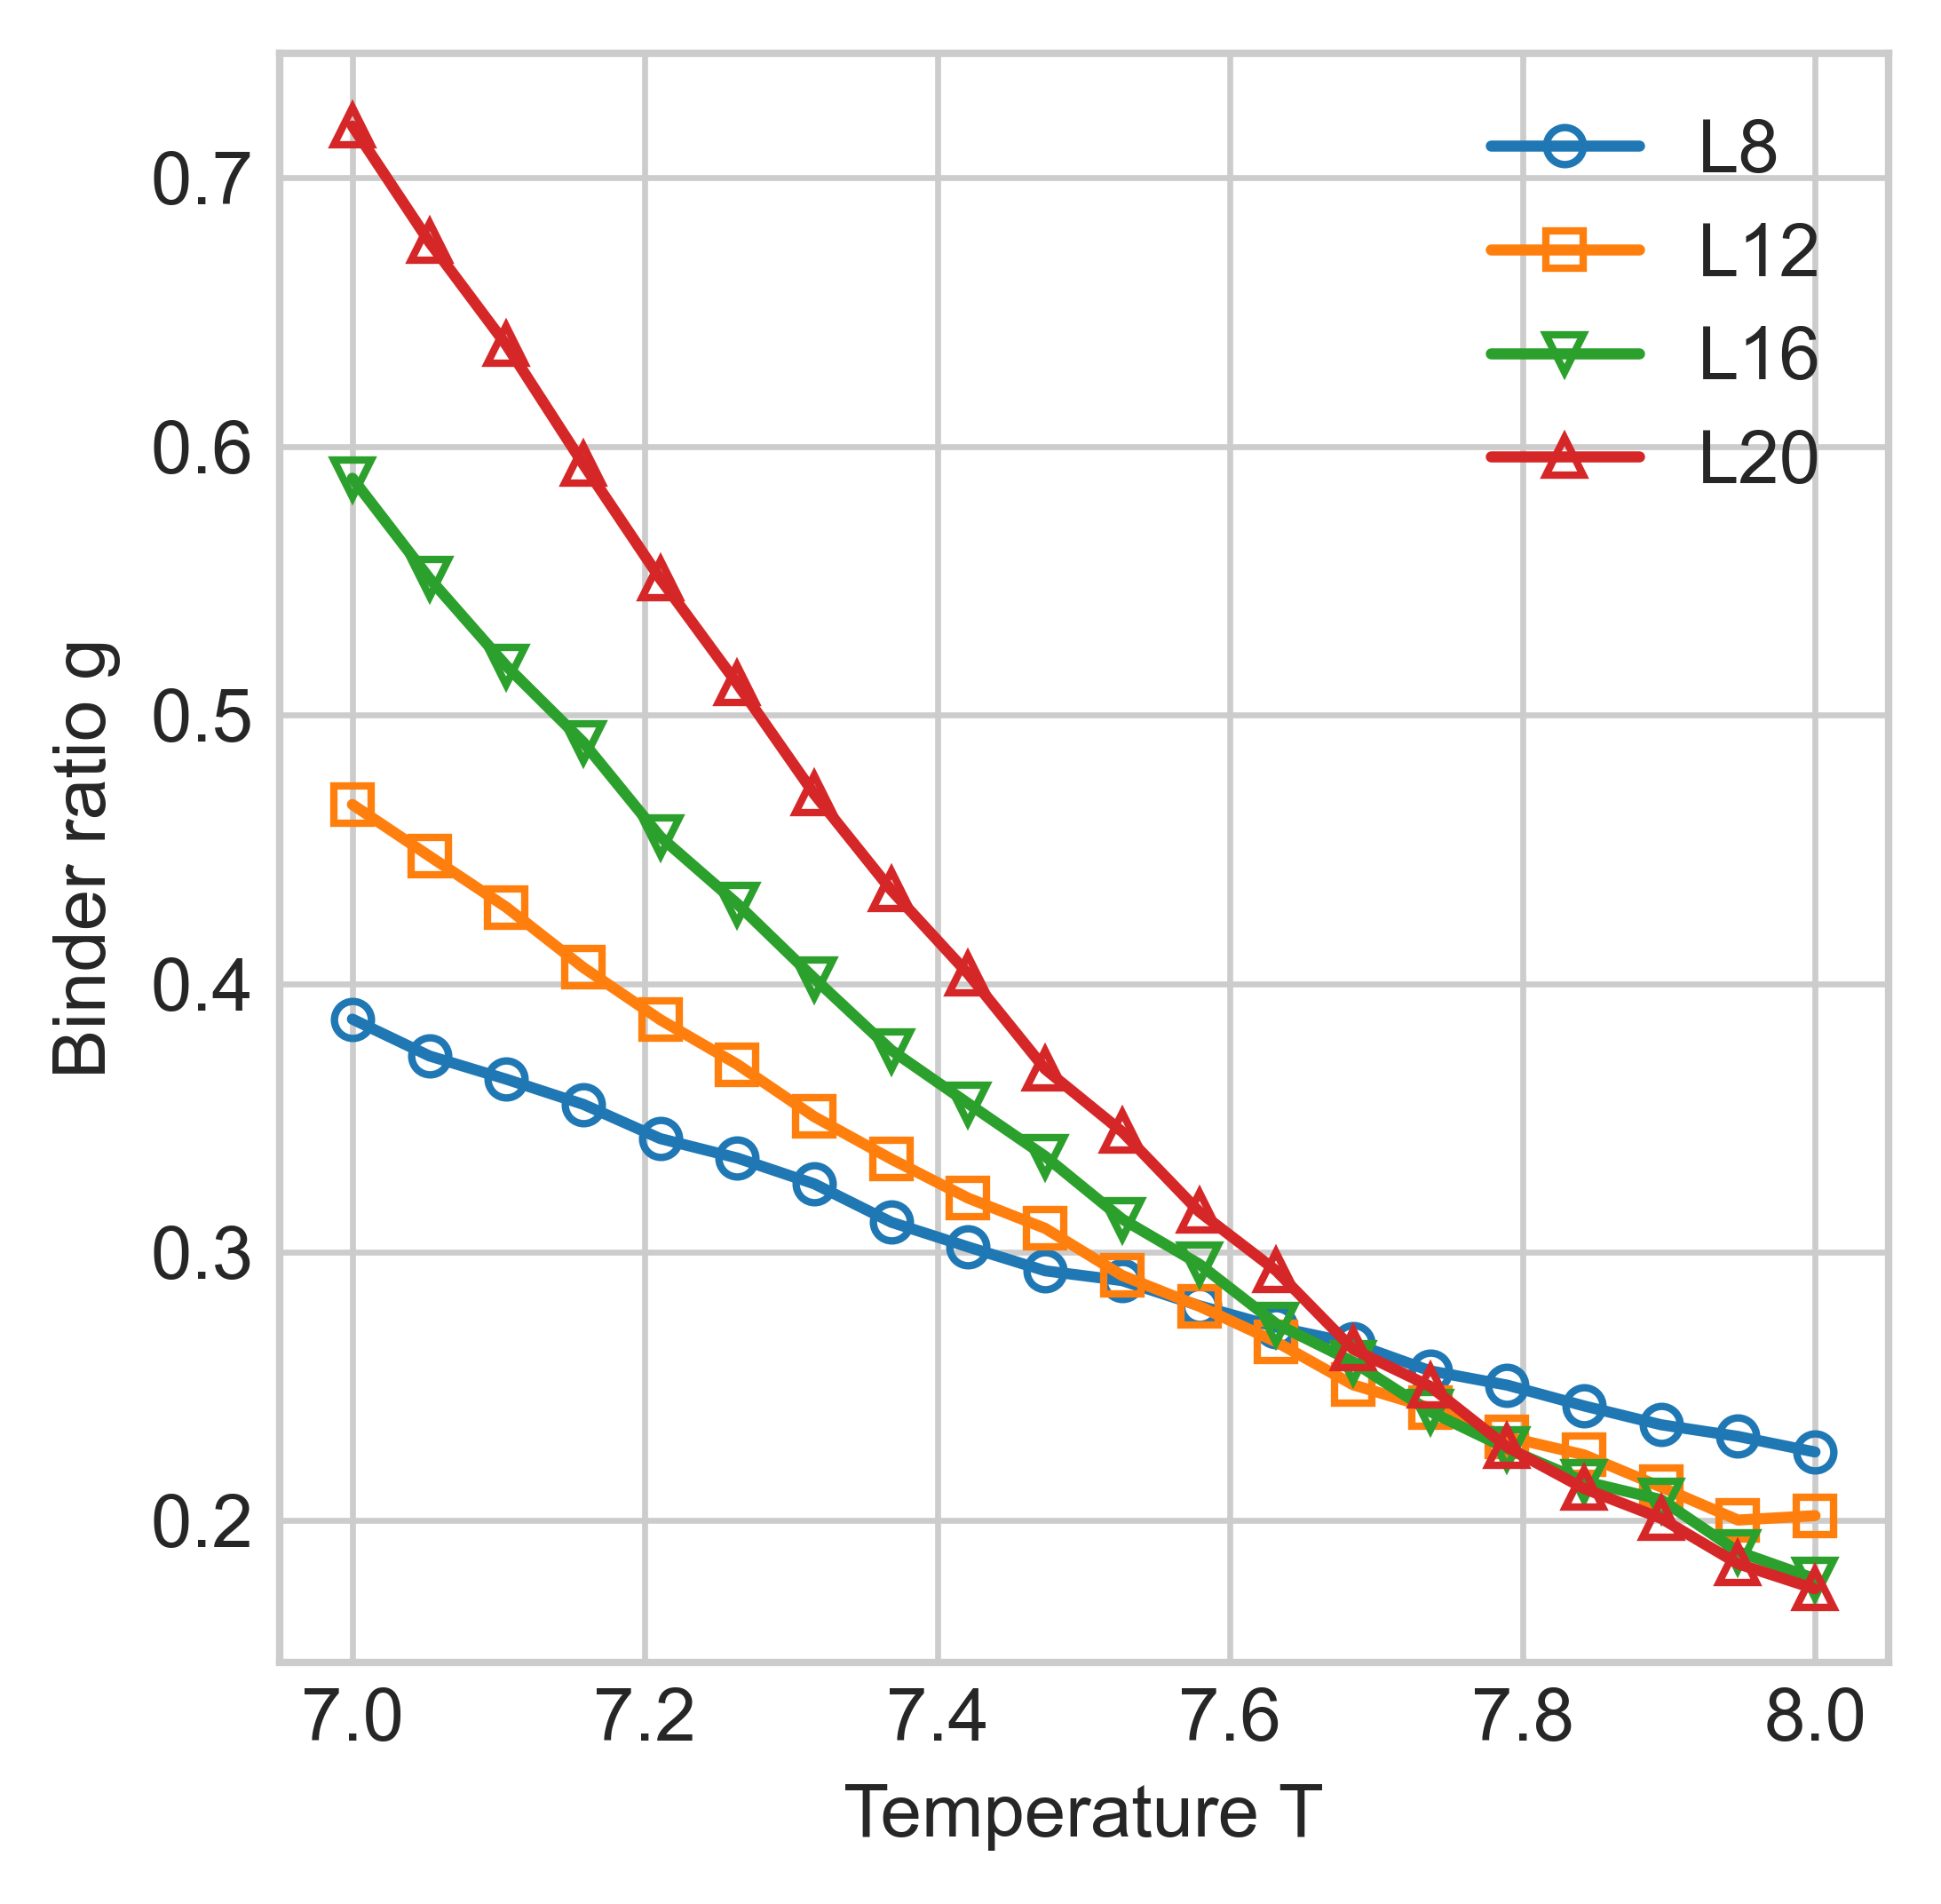

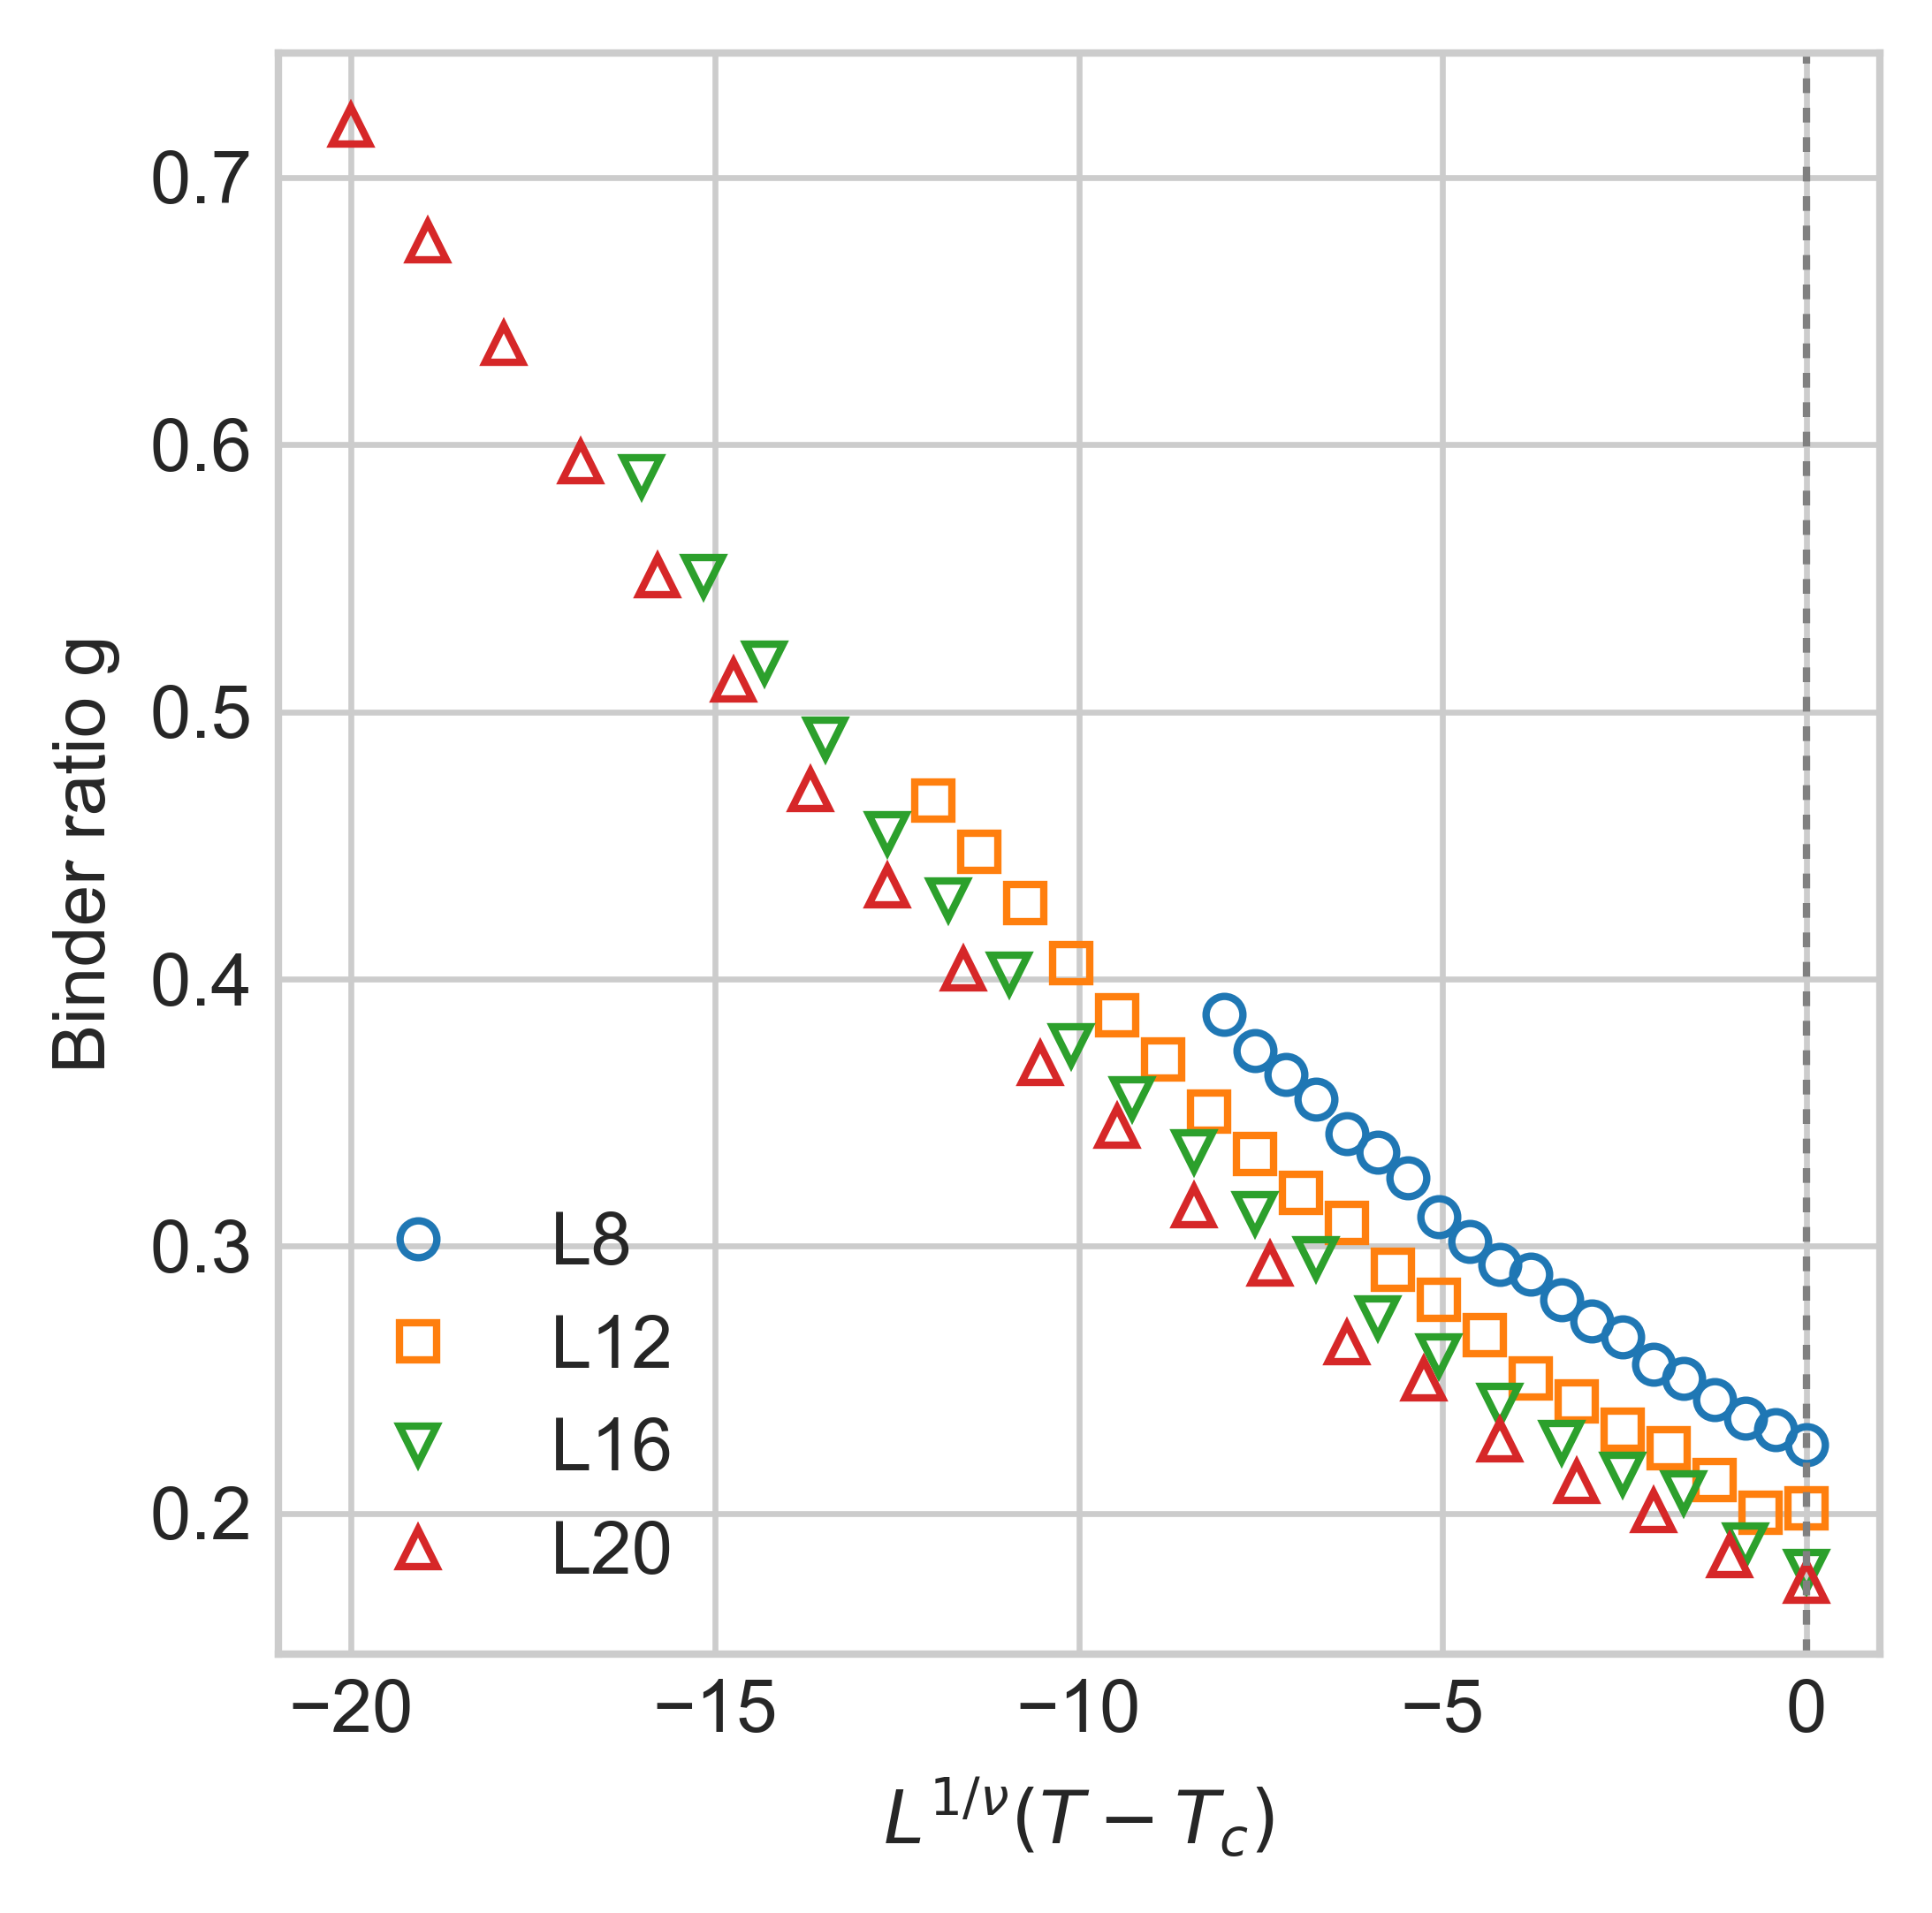

In [9]:
Binder_plot2(4,"../../Project1/Long_range_metropolis/Import/alpha3/Near8_mcs2/Metropolis_LR_c_","_int20_mcs1000000_a3.000000_Test__1",[8,12,16,20],Tc=8,nu=1)

In [10]:
# Binder_plot(5,"../C++/Result/Binder/Wolff_c_","_int40_1",[24,32,48,64,96])

In [11]:
# Binder_plot(5,"../C++/Wolff/Result/FSS/Wolff_c_0_int25_binder1e5_","_1",[24,32,48,64,96])

In [12]:
def FSS_plot(num, path1, path2, Llist):
    Data = [pd.read_csv(path1 + str(i) + path2 + ".csv") for i in Llist]
    Lname = ["L" + str(lattice) for lattice in Llist]
    marker = ["o","s","v","^","8"] * 2
    T2 = np.array(Data[0].iloc[:,1].values)
    Susep = np.array([(Data[i].iloc[:,5].values - (Data[i].iloc[:,4].values)**2)*1/T2*Llist[i]**2 for i in range(num)],dtype=np.double)

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(bottom = 0)
    plt.xlim(2.2,2.35)
    for i in range(num):
        plt.plot(T2,Susep[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Magnetic Suseptibility')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(1e-3,1e-1)
    # plt.xlim(1e-1,1e0)
    xx = np.linspace(1e-1,1e0)
    T22 = (T2/(2/np.log(1+np.sqrt(2)))-1)

    # count = 0
    # while(T22[count] <0):
    #     count += 1

    # for i in range(num):
    #     plt.loglog(abs(T22[0:count]),(Susep[i]*Llist[i]**(-1.75))[0:count],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])

    for i in range(num):
        plt.loglog(abs(T22*Llist[i]),(Susep[i]*Llist[i]**(-1.75)),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    plt.loglog(xx,0.005*xx**(-1.75))
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()
    # plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Magnetic Suseptibility')
    plt.xlabel('$L^{1/\\nu}(T-T_c)$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()


    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num):
        plt.plot(T22*Llist[i],Susep[i]*Llist[i]**(-1.75),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()    
    plt.axvline(x=0,c='grey'    ,lw=1,dashes=[2,2])
    plt.ylabel('Magnetic Suseptibility FSS')
    plt.xlabel('$L^{1/\\nu}(T-T_c)$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

# FSS_plot(5,"../C++/Wolff/Result/FSS/Wolff_c_0_int25_binder1e5_","_1",[24,32,48,64,96])

In [13]:
def FSS_plot2(num, path1, path2, Llist):
    Data = [pd.read_csv(path1 + str(i) + path2 + ".csv") for i in Llist]
    Lname = ["L" + str(lattice) for lattice in Llist]
    marker = ["o","s","v","^","8"] * 2
    T2 = np.array(Data[0].iloc[:,1].values)
    MM = np.array([Data[i].iloc[:,2].values for i in range(num)],dtype=np.double)
    CC = np.array([Data[i].iloc[:,3].values for i in range(num)],dtype=np.double)
    Susep = np.array([(Data[i].iloc[:,5].values - (Data[i].iloc[:,4].values)**2)*1/T2*Llist[i]**2 for i in range(num)],dtype=np.double)

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(bottom = 0)
    plt.xlim(2.2,2.35)
    for i in range(num):
        plt.plot(T2,Susep[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

    plt.legend()
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Magnetic Suseptibility')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()

    T22 = (T2/(2/np.log(1+np.sqrt(2)))-1)

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num): ## -beta
        plt.plot(T22*Llist[i],MM[i]*Llist[i]**(1/8),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()    
    plt.axvline(x=0,c='grey'    ,lw=1,dashes=[2,2])
    plt.ylabel('Magnetization FSS')
    plt.xlabel('$L^{1/\\nu}(T-T_c)/T_c$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num): ## -alpha
        plt.plot((T22)*Llist[i],CC[i]/np.log(Llist[i]),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()    
    plt.axvline(x=0,c='grey'    ,lw=1,dashes=[2,2])
    plt.ylabel('Specific Heat FSS')
    plt.xlabel('$L^{1/\\nu}(T-T_c)/T_c$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num): ## -gamma
        plt.plot(T22*Llist[i],Susep[i]*Llist[i]**(-1.75),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()    
    plt.axvline(x=0,c='grey'    ,lw=1,dashes=[2,2])
    plt.ylabel('Magnetic Suseptibility FSS')
    plt.xlabel('$L^{1/\\nu}(T-T_c)/T_c$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

# FSS_plot2(5,"../C++/Wolff/Result/FSS/Wolff_c_0_int25_binder1e5_","_1",[24,32,48,64,96])

In [14]:
def FSS_plot3(num, path1, path2, Llist,Tc = 1, nu = 1, beta=1/8, gamma = 7/4):
    Data = [pd.read_csv(path1 + str(i) + path2 + ".csv") for i in Llist]
    Lname = ["L" + str(lattice) for lattice in Llist]
    marker = ["o","s","v","^","8"] * 2
    T2 = np.array([Data[i].iloc[:,1].values for i in range(num)],dtype=np.double)
    print(T2)
    MM = np.array([Data[i].iloc[:,2].values for i in range(num)],dtype=np.double)
    CC = np.array([Data[i].iloc[:,3].values for i in range(num)],dtype=np.double)
    Susep = np.array([(Data[i].iloc[:,5].values - (Data[i].iloc[:,4].values)**2)*1/T2[i]*Llist[i]**2 for i in range(num)],dtype=np.double)

    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    plt.ylim(0,1)
    # plt.xlim(2.2,2.35)
    for i in range(num):
        plt.plot(T2[i],MM[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()


    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(bottom = 0)
    # plt.xlim(2.2,2.35)
    for i in range(num):
        plt.plot(T2[i],CC[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()


    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(bottom = 0)
    # plt.xlim(2.2,2.35)
    for i in range(num):
        plt.plot(T2[i],Susep[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()
    # plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.ylabel('Magnetic Suseptibility')
    plt.xlabel('Temperature T')
    # plt.text(2.265,0.748, '$T_c$')
    plt.show()
    
    T22 = (T2/Tc-1)

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num): ## -beta
        plt.plot(T22[i]*(Llist[i])**(1/nu),MM[i]*Llist[i]**(beta),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()    
    # plt.axvline(x=0,c='grey'    ,lw=1,dashes=[2,2])
    plt.ylabel('Magnetization FSS')
    plt.xlabel('$L^{1/\\nu}(T-T_c)/T_c$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num): ## -alpha
        plt.plot(T22[i]*(Llist[i])**(1/nu),CC[i]/(np.log(Llist[i]))**(0.93),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()    
    # plt.axvline(x=0,c='grey'    ,lw=1,dashes=[2,2])
    plt.ylabel('Specific Heat FSS')
    plt.xlabel('$L^{1/\\nu}(T-T_c)/T_c$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

    fig = plt.figure(dpi=600)
    ax = fig.add_subplot(111)
    # plt.ylim(0.75,1)
    # plt.xlim(-2,2)
    for i in range(num): ## -gamma
        plt.plot(T22[i]*(Llist[i])**(1/nu),Susep[i]*Llist[i]**(-gamma),linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.legend()    
    # plt.axvline(x=0,c='grey'    ,lw=1,dashes=[2,2])
    plt.ylabel('Magnetic Suseptibility FSS')
    plt.xlabel('$L^{1/\\nu}(T-T_c)/T_c$')
    # plt.xlabel('$L^{1/\nu}[T-T_c]$')
    plt.show()

[[4.5      4.568421 4.636842 4.705263 4.773684 4.842105 4.910526 4.978947
  5.047368 5.115789 5.184211 5.252632 5.321053 5.389474 5.457895 5.526316
  5.594737 5.663158 5.731579 5.8     ]
 [5.5      5.552632 5.605263 5.657895 5.710526 5.763158 5.815789 5.868421
  5.921053 5.973684 6.026316 6.078947 6.131579 6.184211 6.236842 6.289474
  6.342105 6.394737 6.447368 6.5     ]
 [5.8      5.852632 5.905263 5.957895 6.010526 6.063158 6.115789 6.168421
  6.221053 6.273684 6.326316 6.378947 6.431579 6.484211 6.536842 6.589474
  6.642105 6.694737 6.747368 6.8     ]
 [5.       5.078947 5.157895 5.236842 5.315789 5.394737 5.473684 5.552632
  5.631579 5.710526 5.789474 5.868421 5.947368 6.026316 6.105263 6.184211
  6.263158 6.342105 6.421053 6.5     ]]


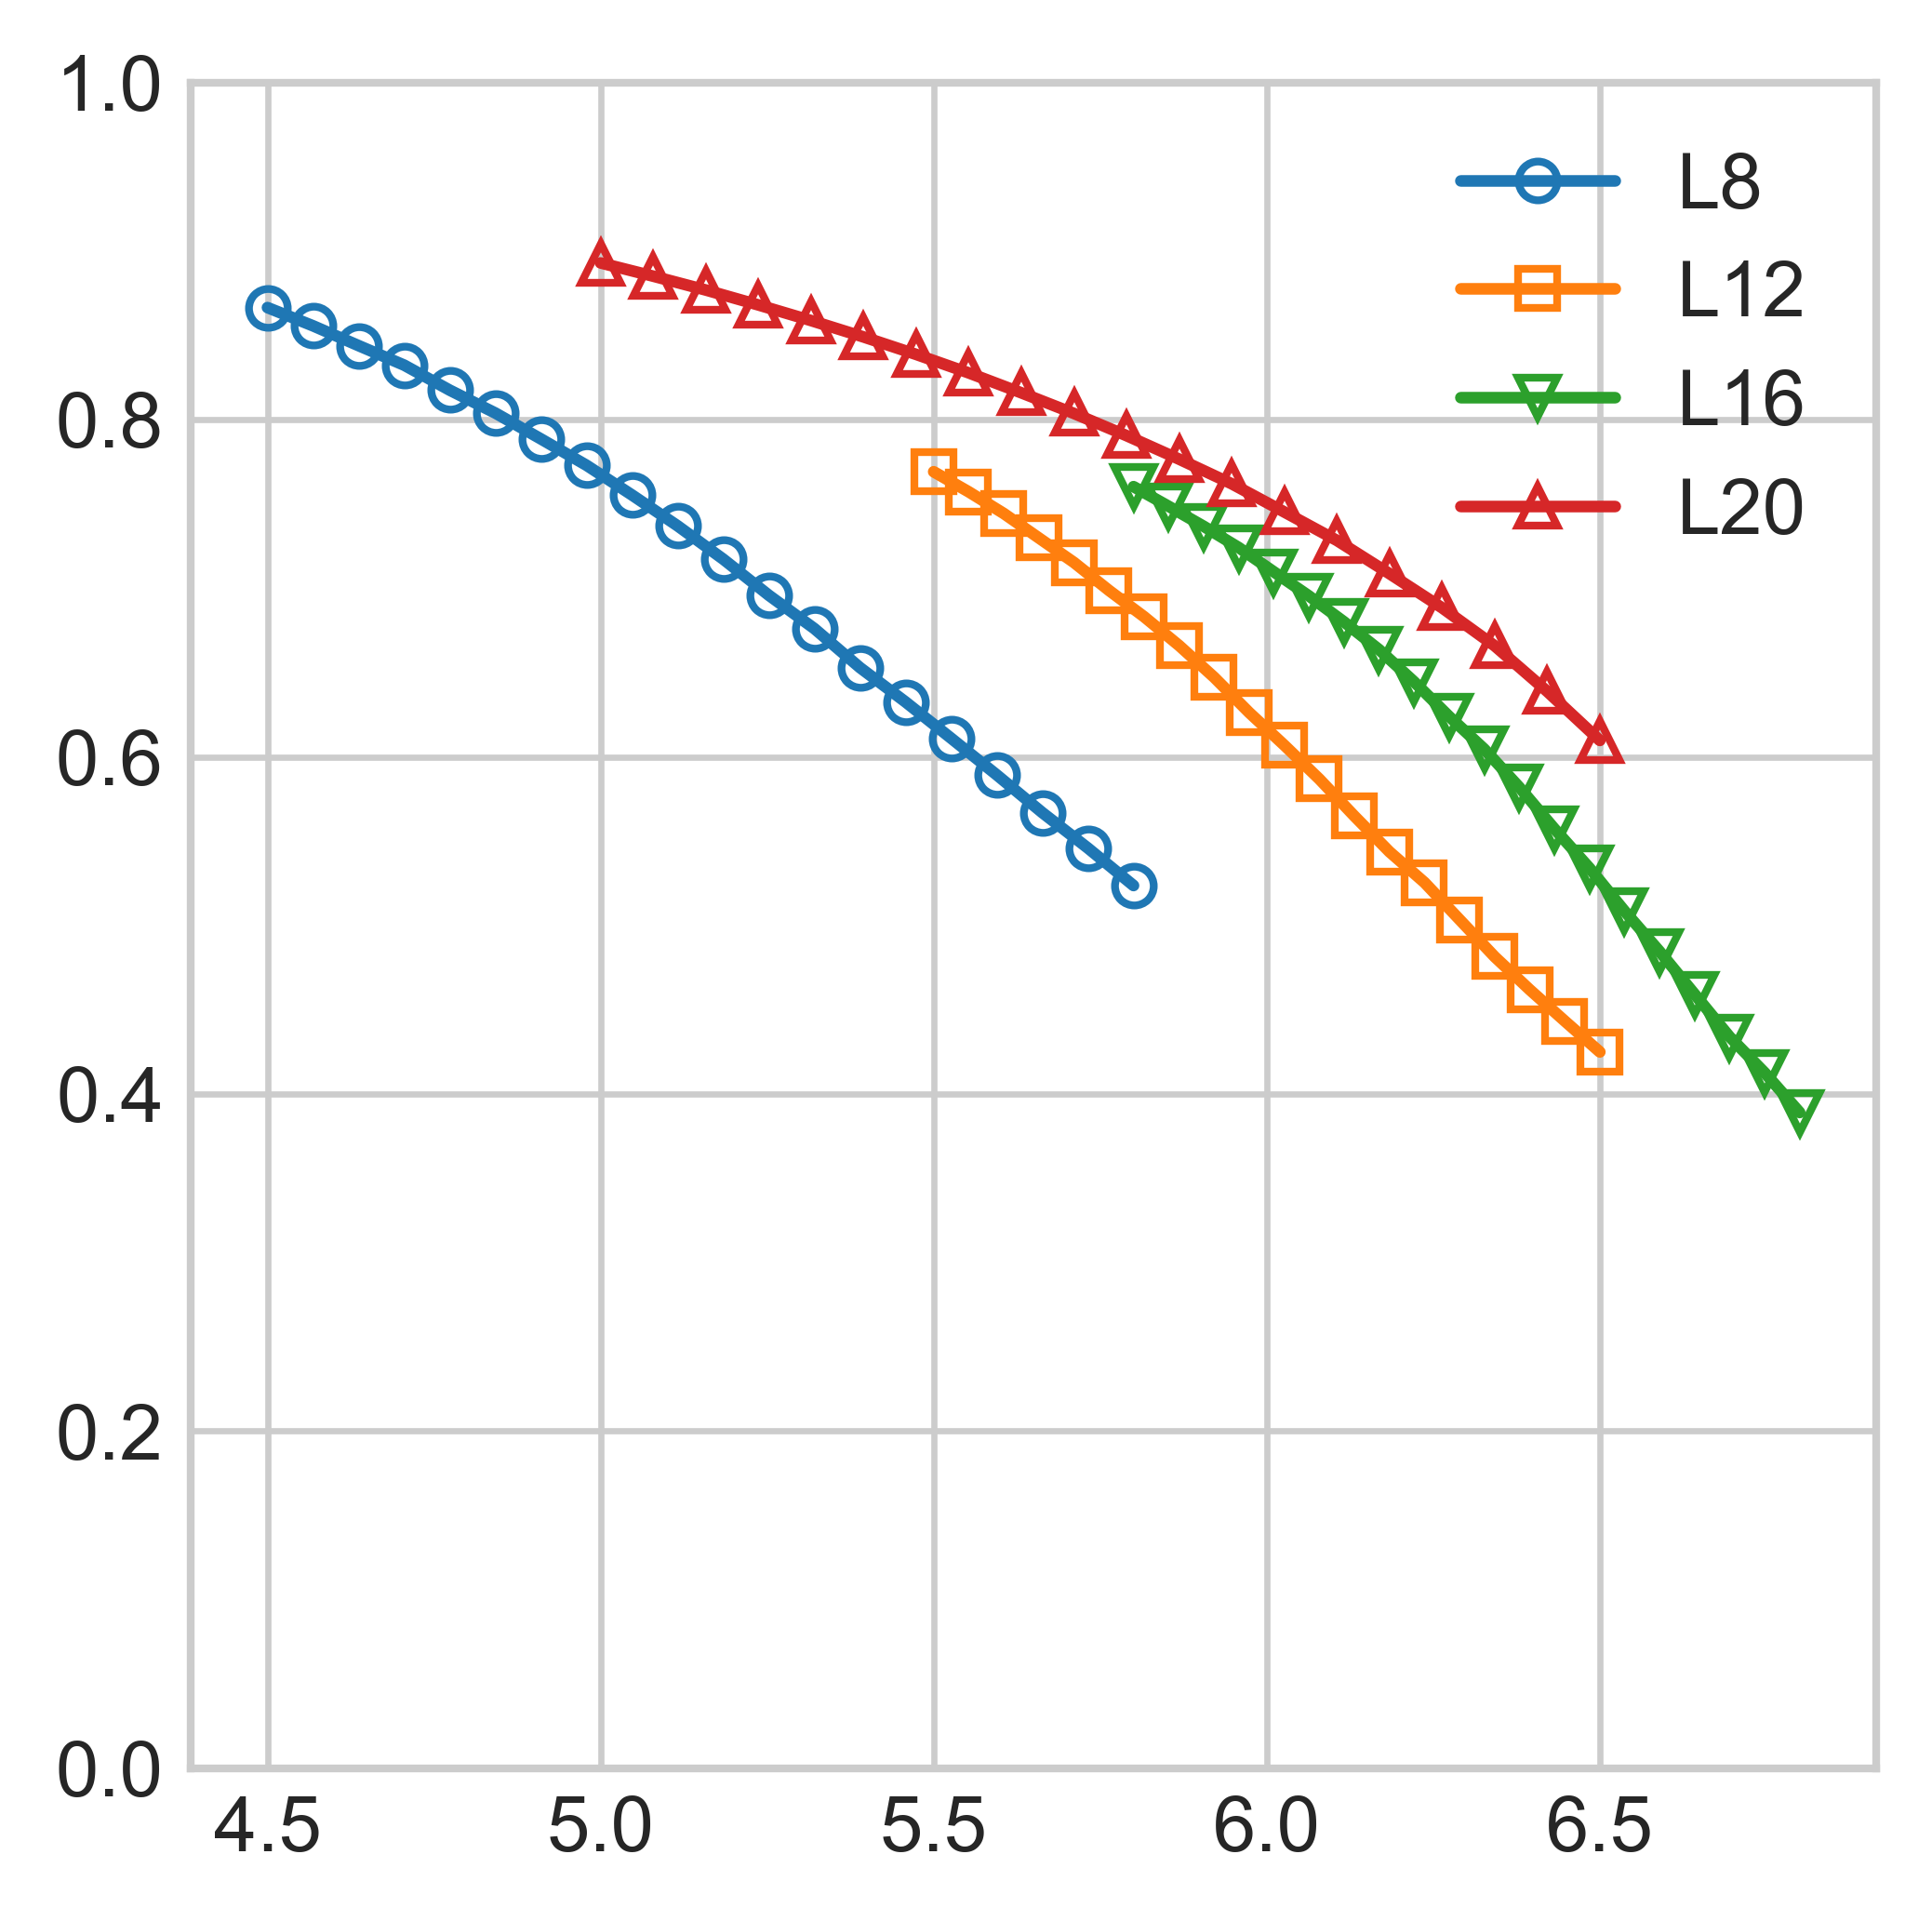

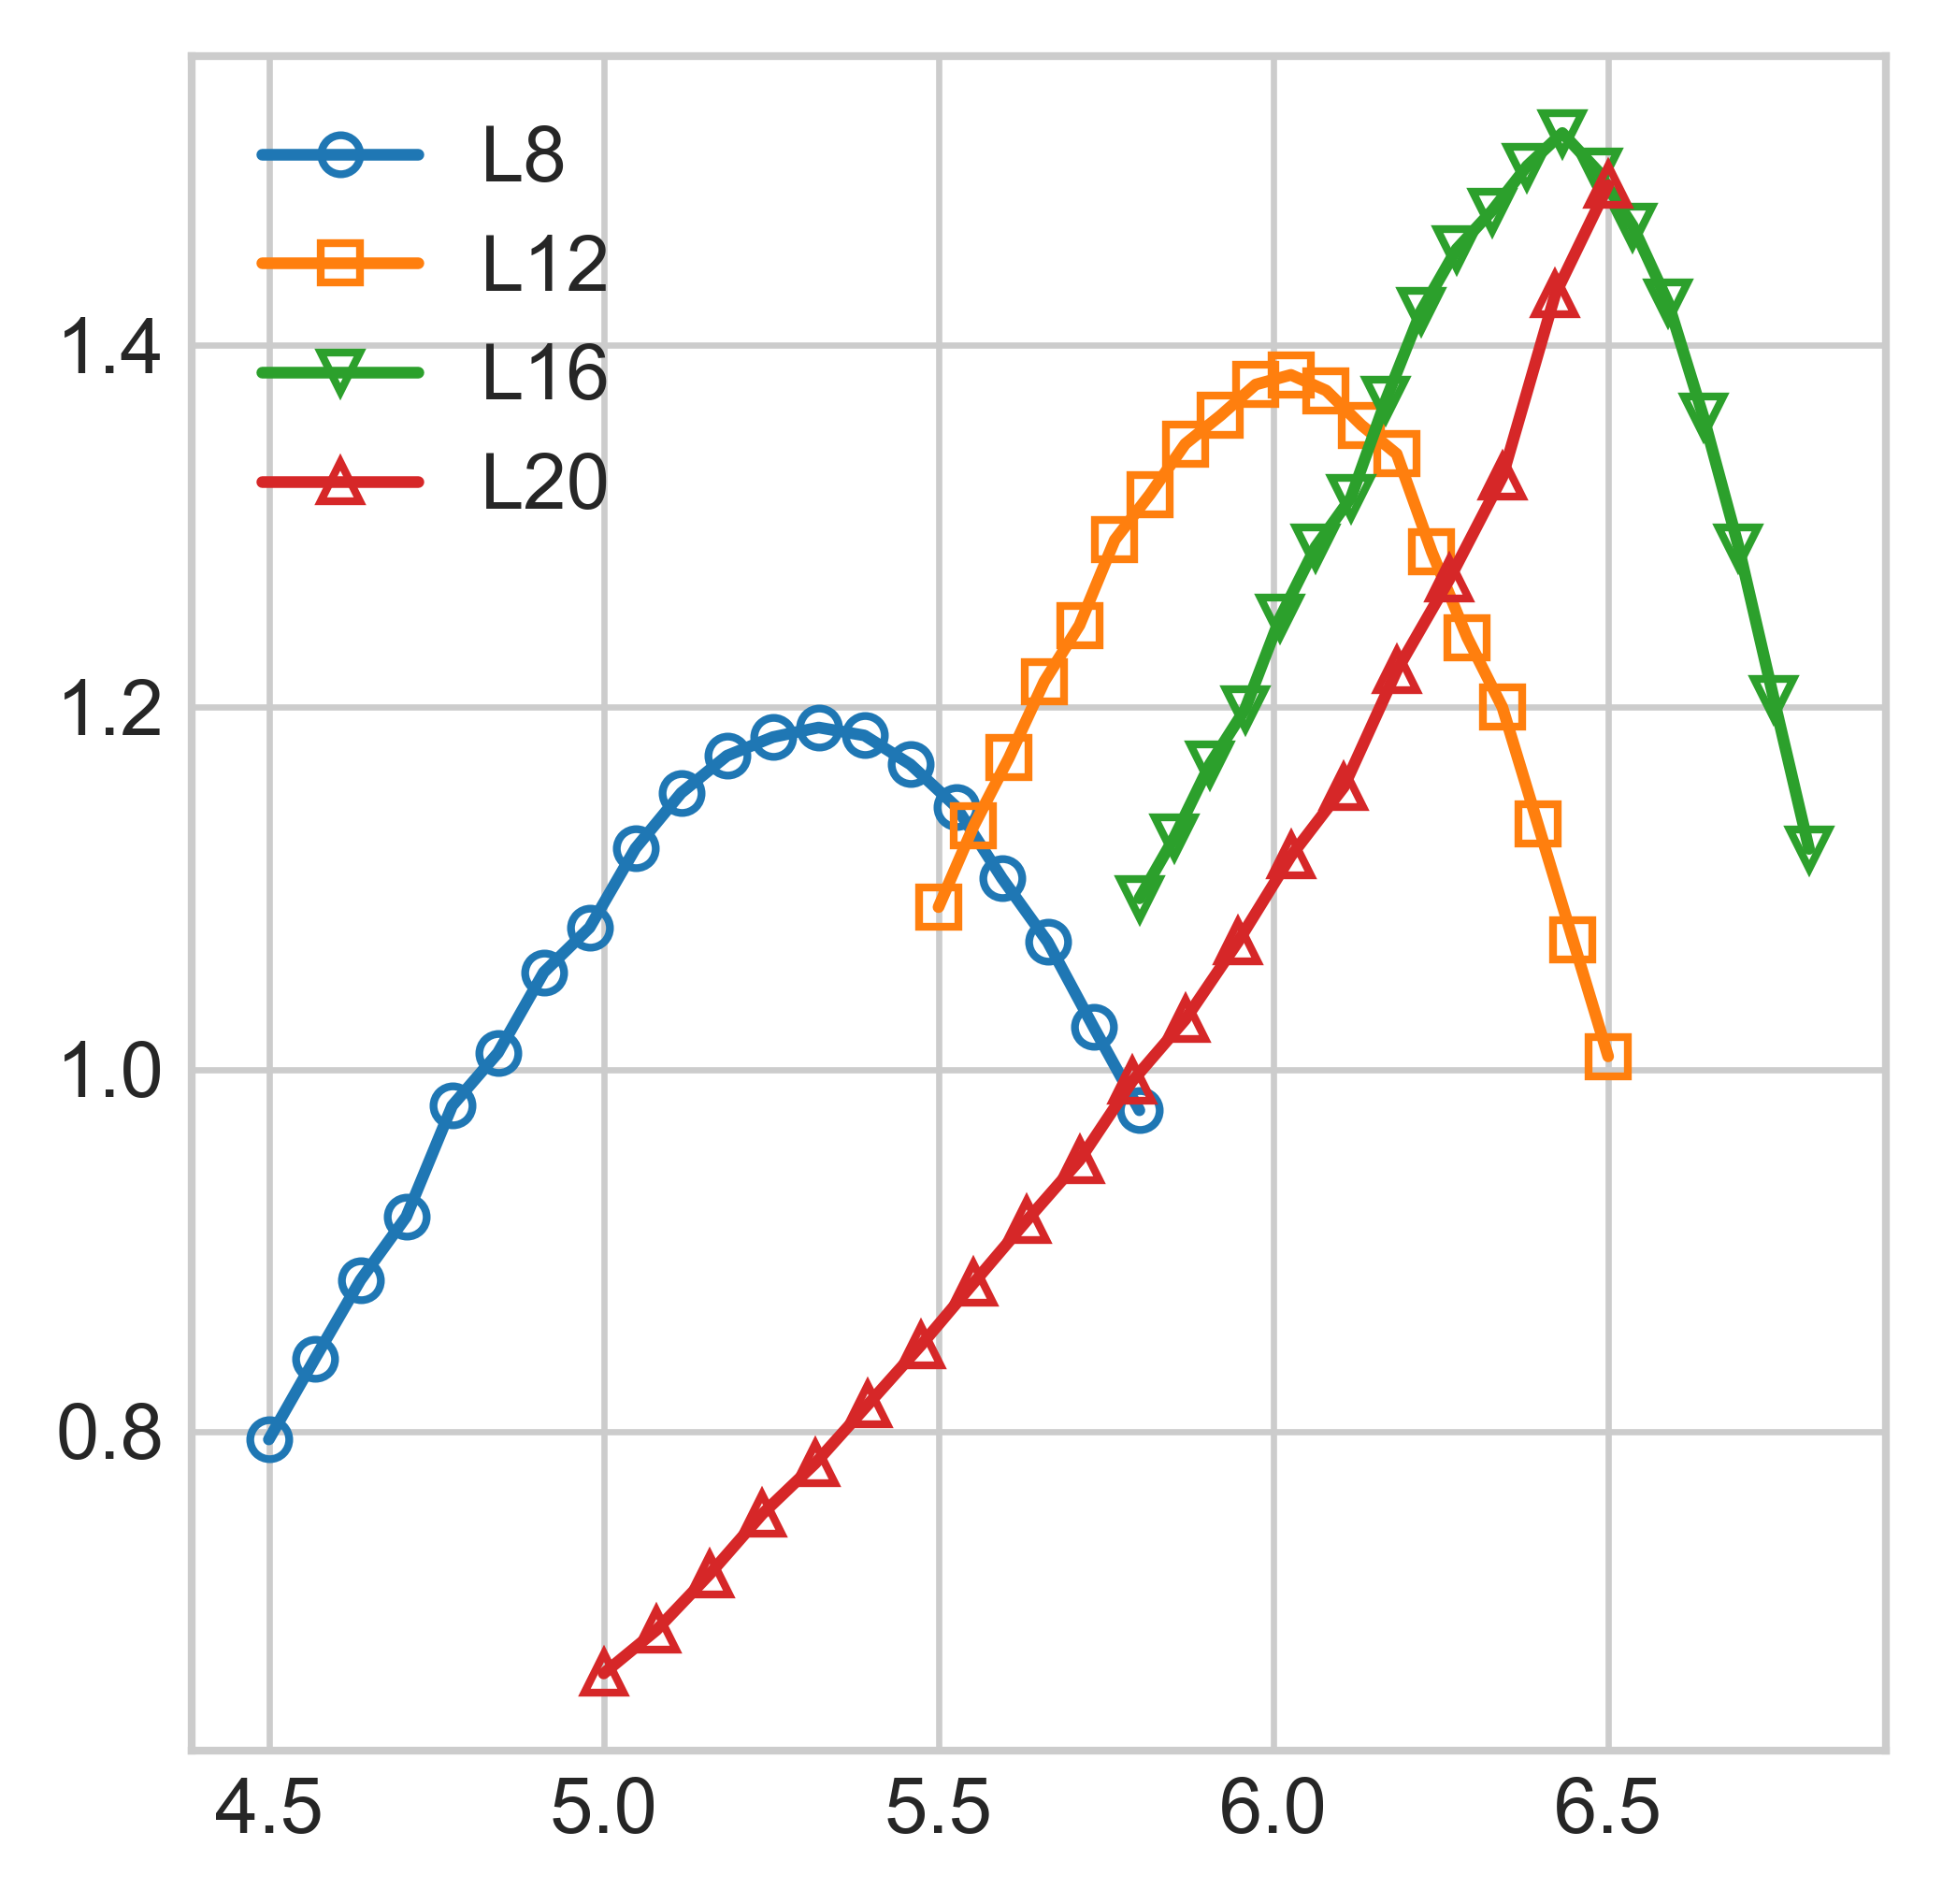

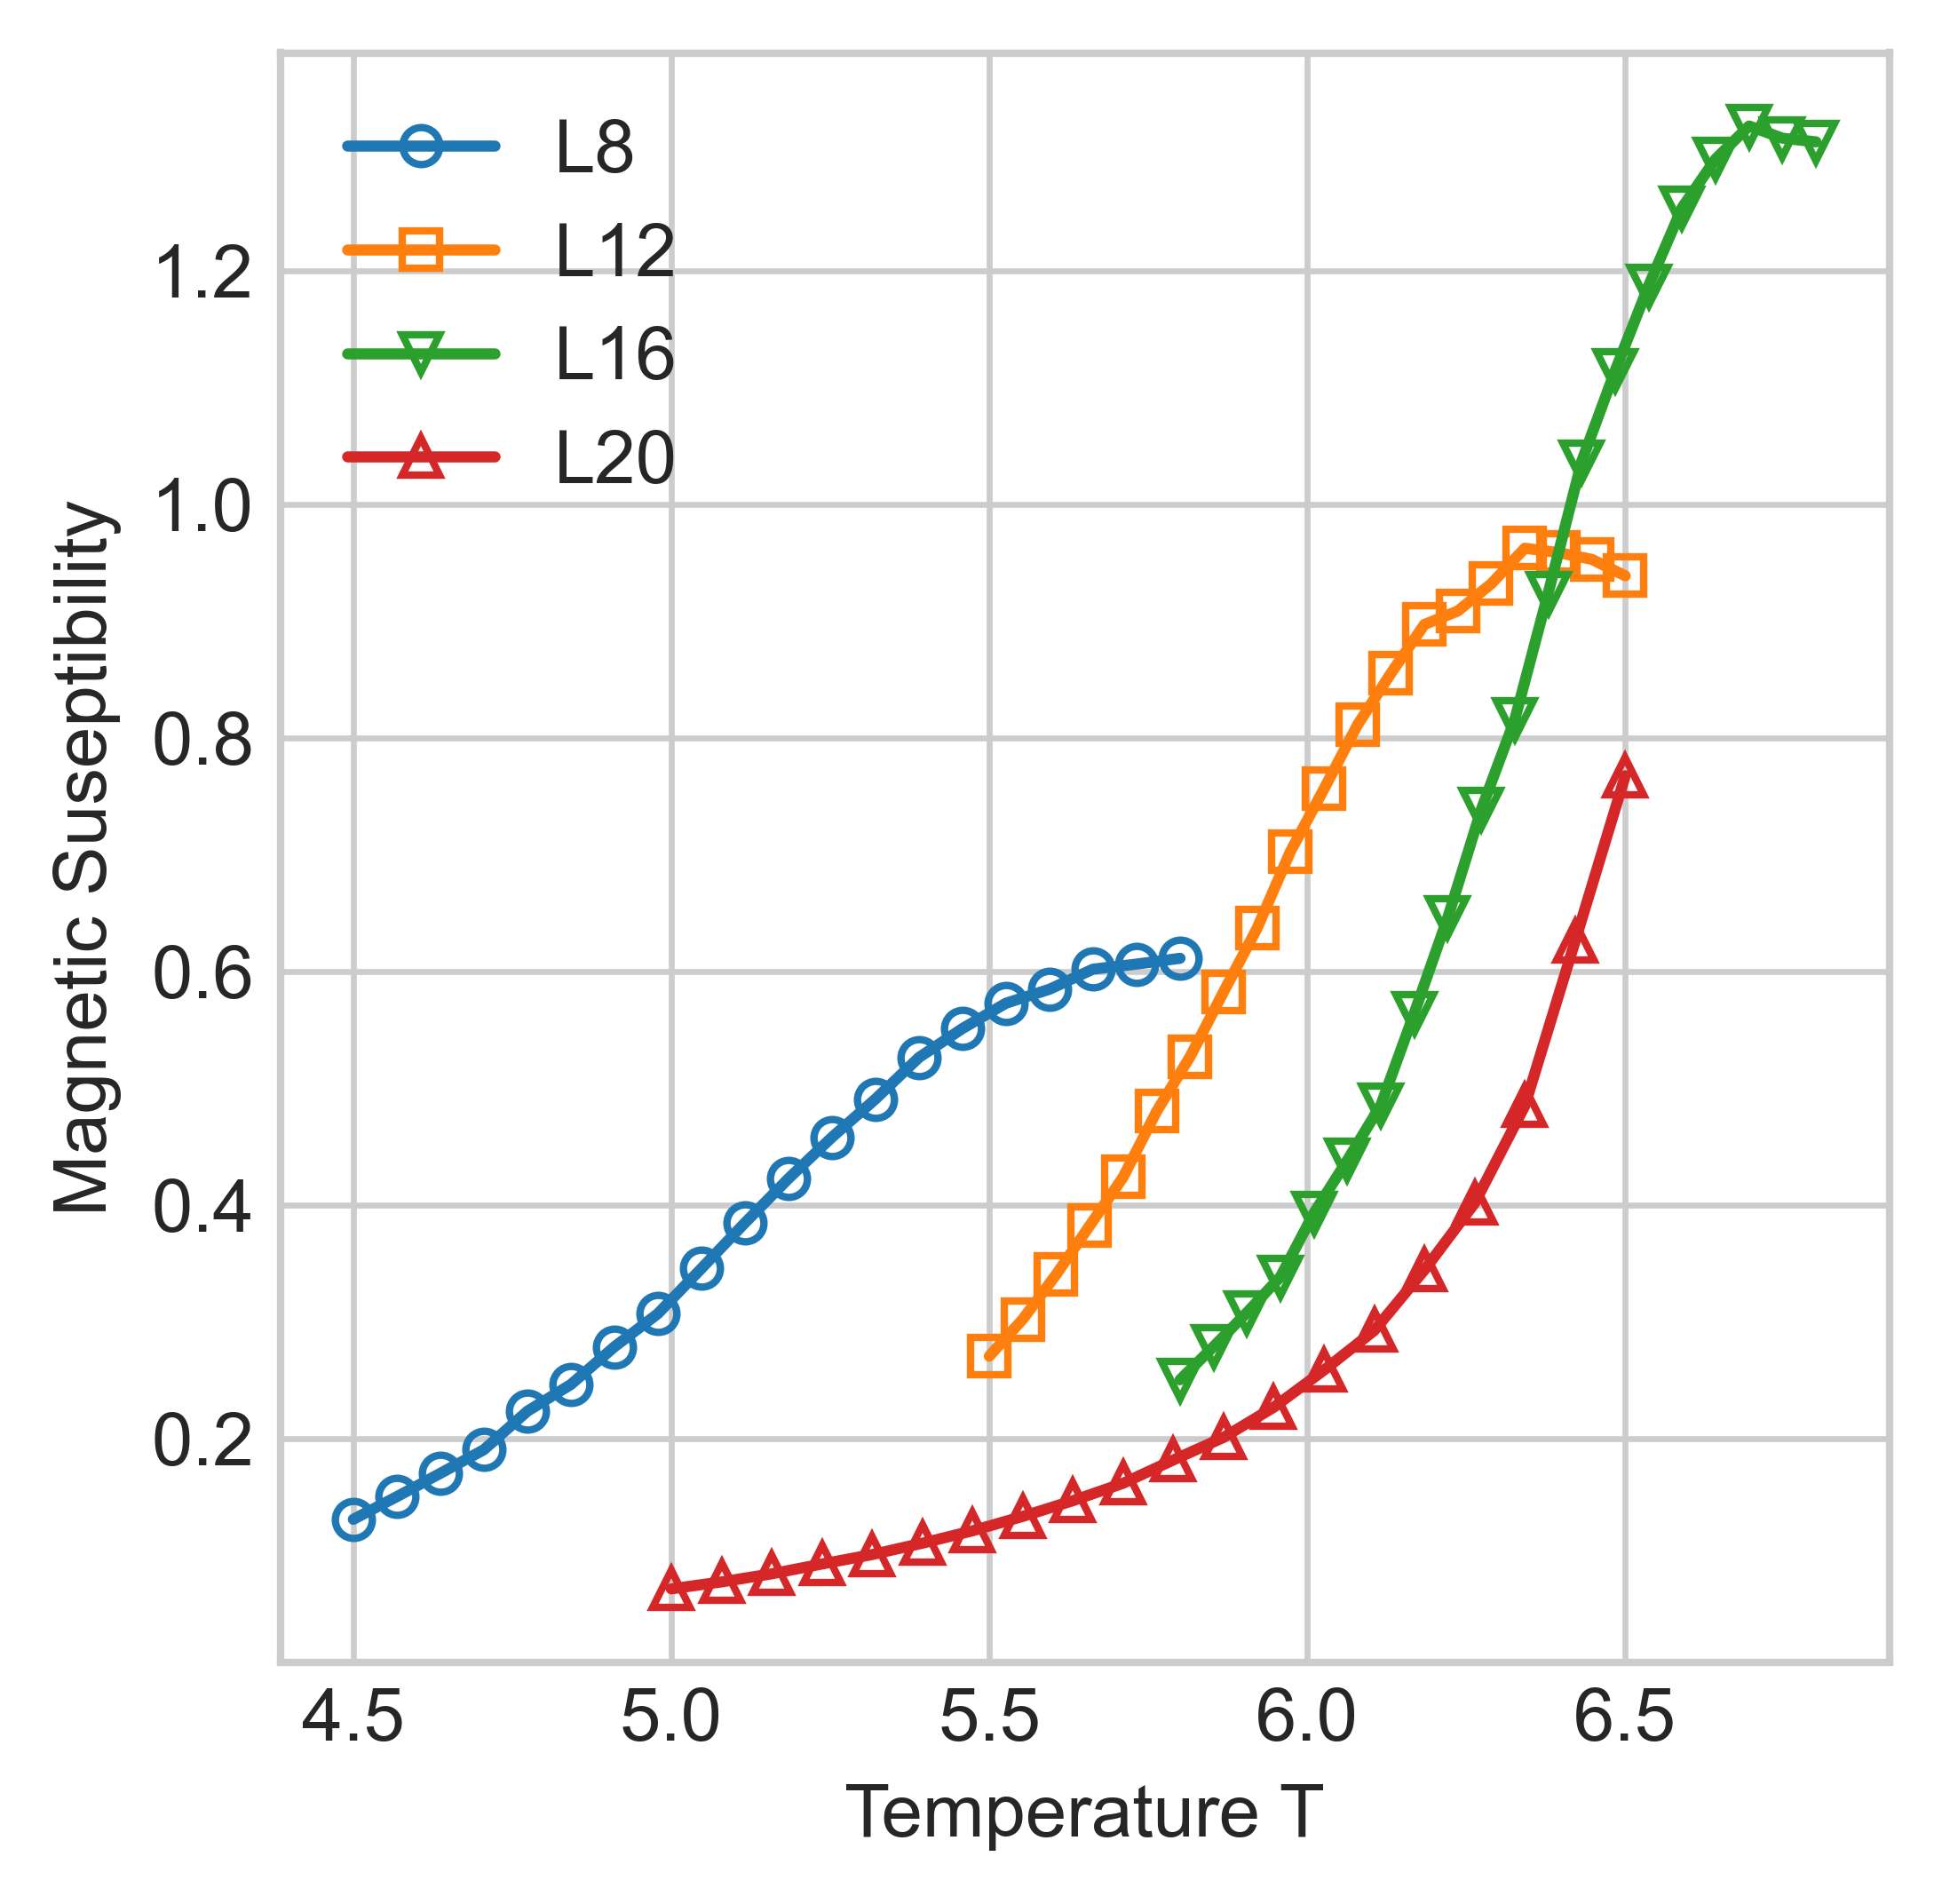

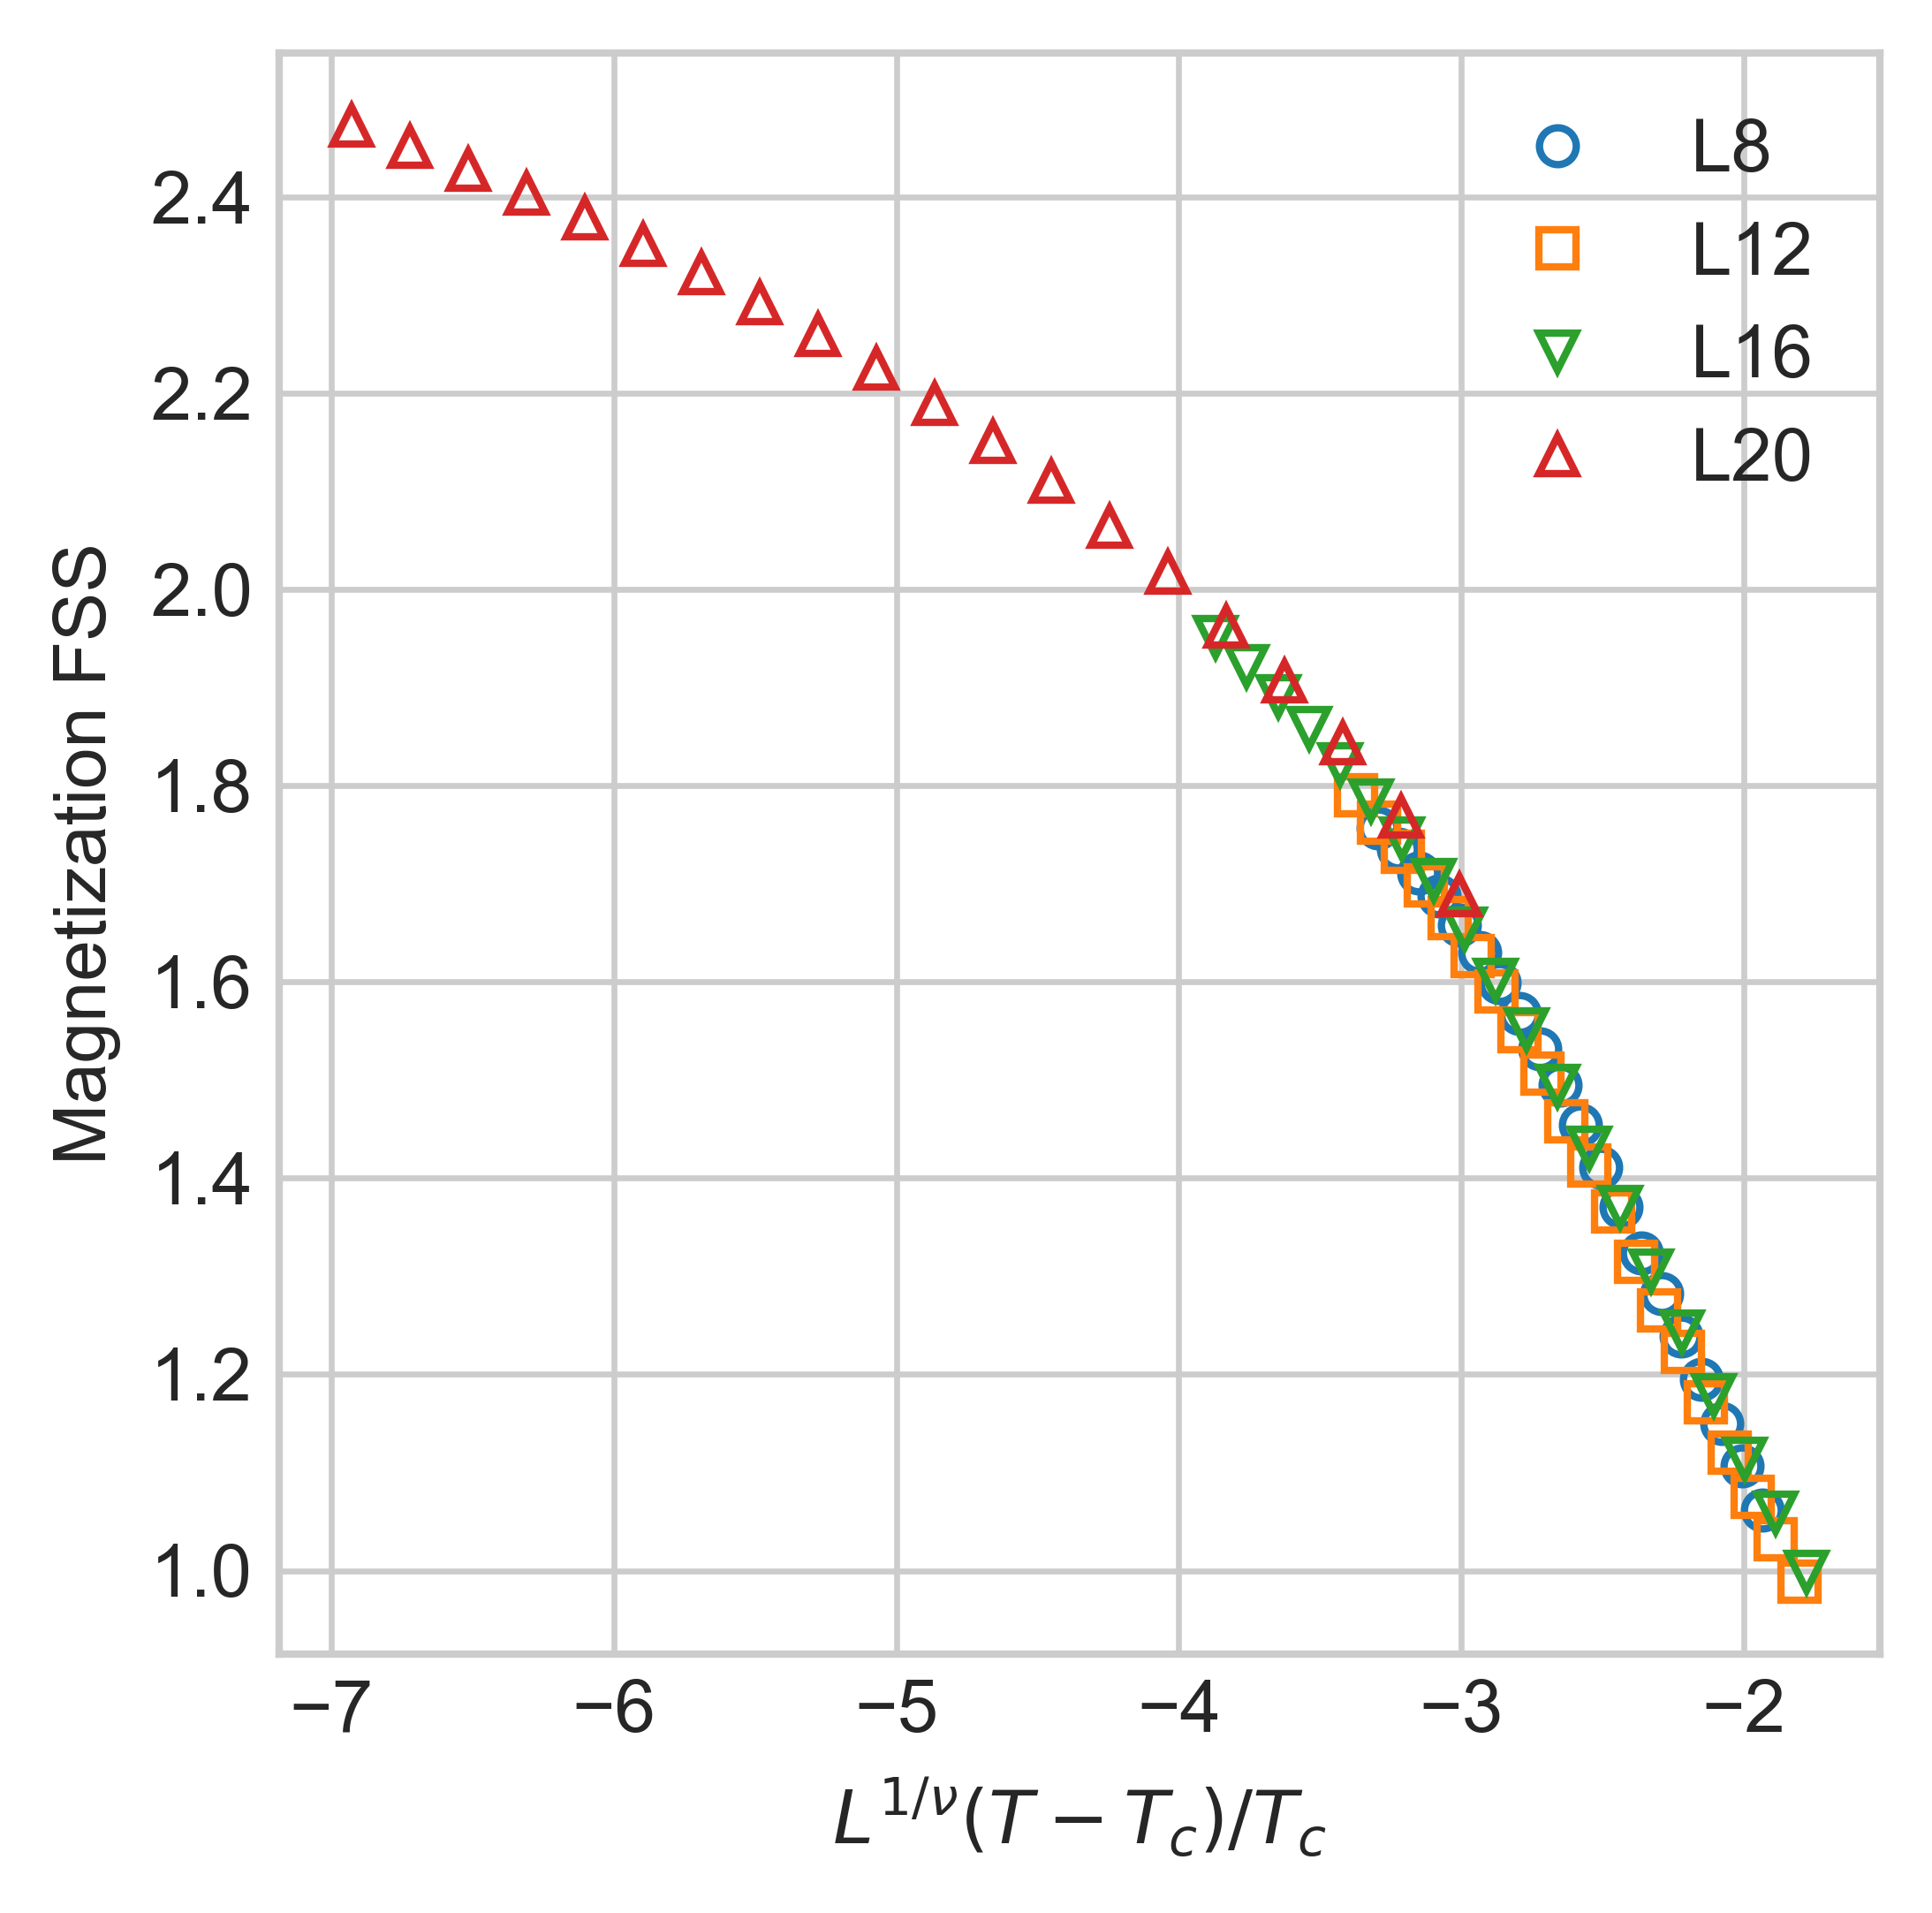

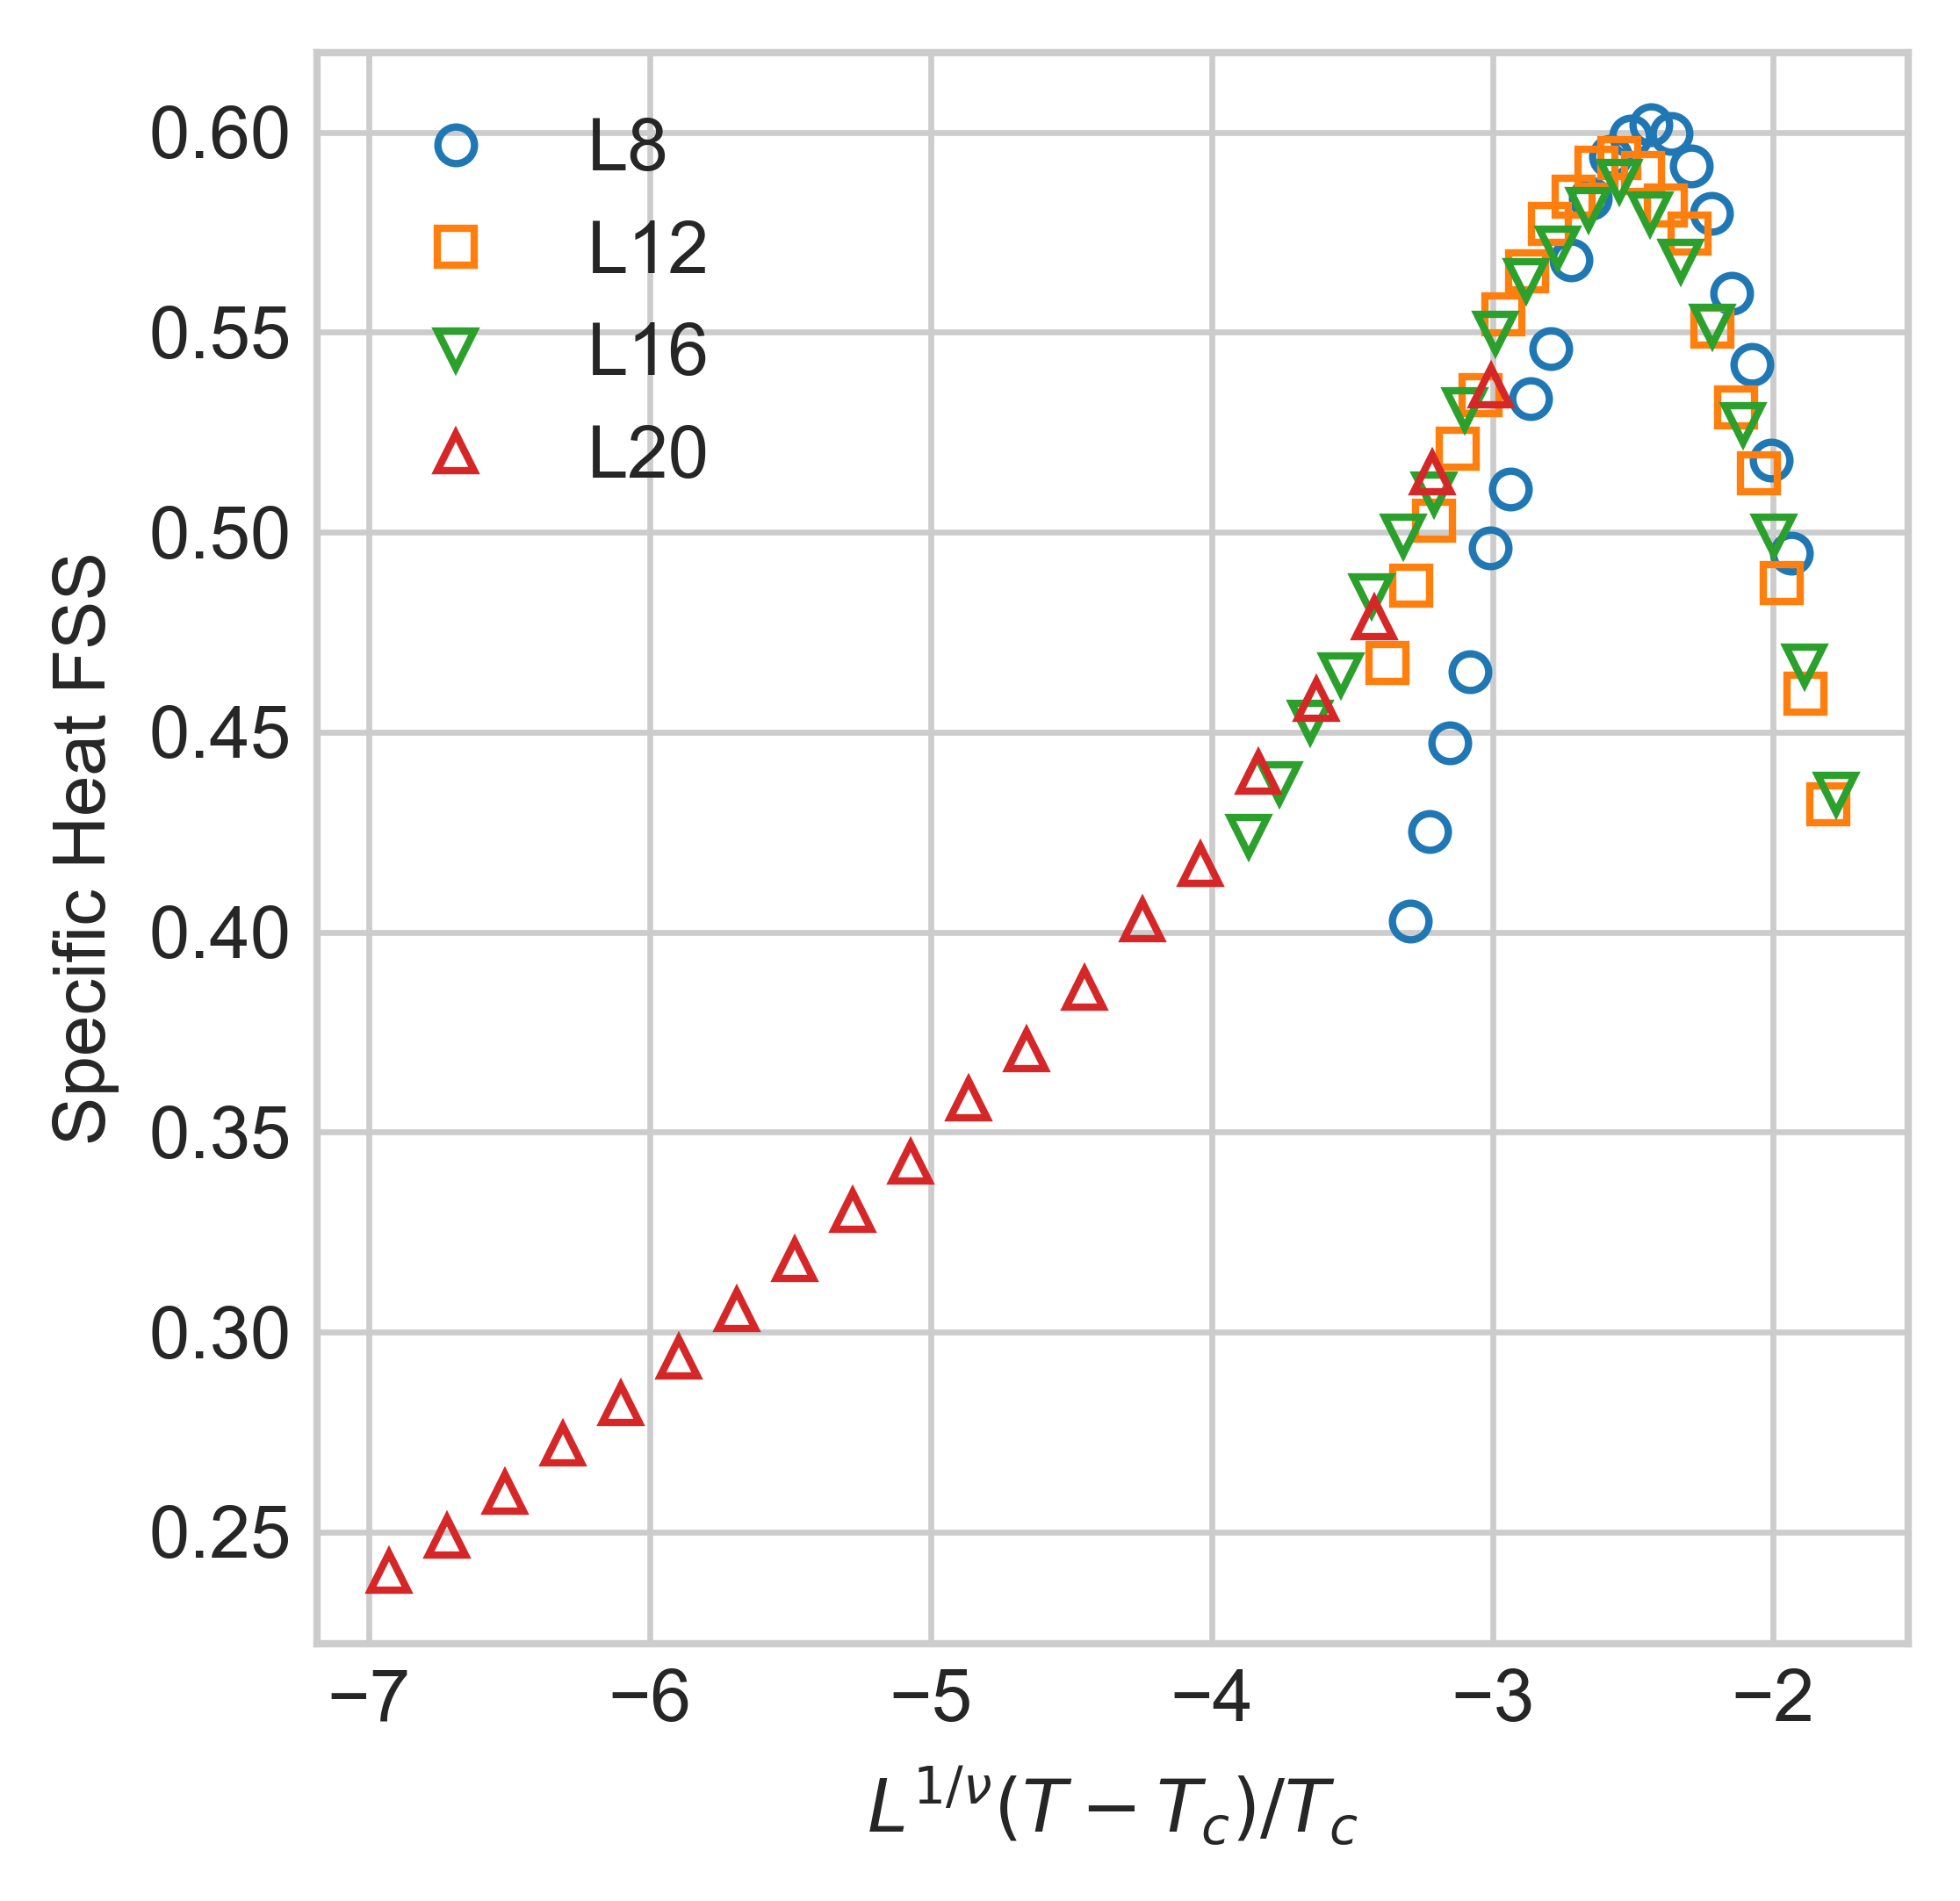

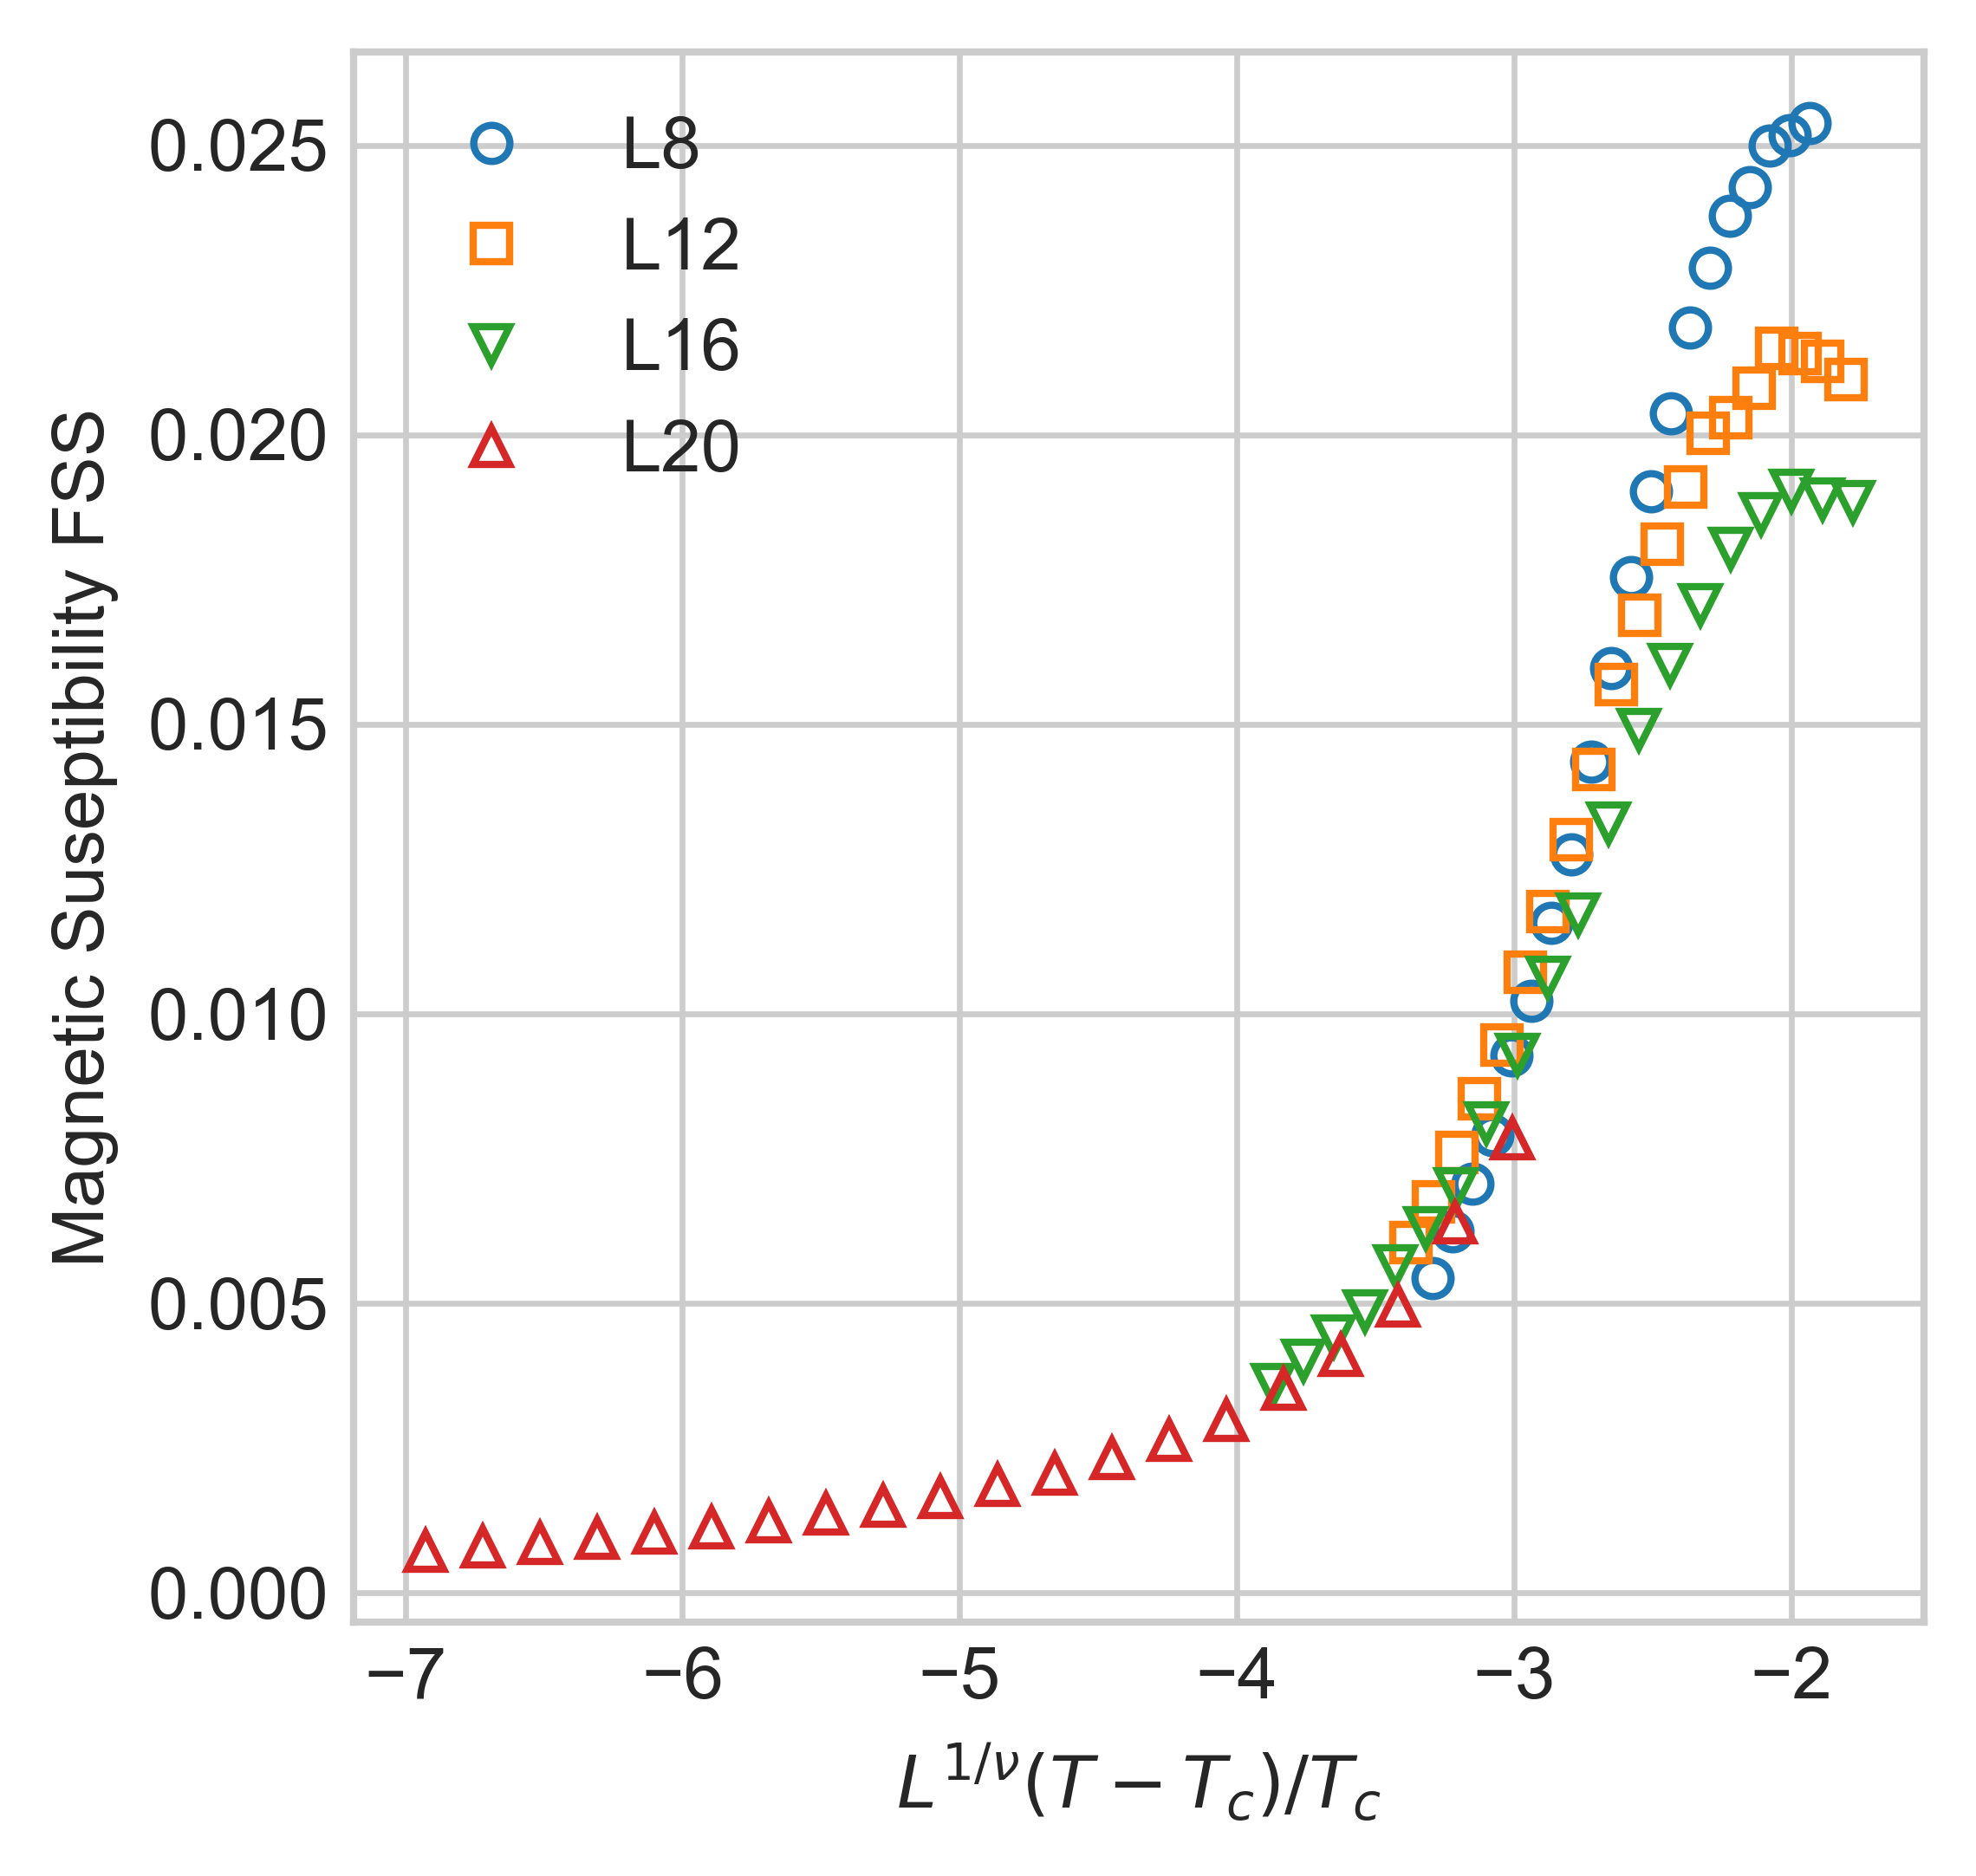

In [15]:
FSS_plot3(4,"../../Project1/Long_range_metropolis/Import/alpha3/Zoom3/Metropolis_LR_c_","_int20_mcs500000_a3.000000_Test__1",[8,12,16,20],Tc=7.65,nu=1,beta=0.34,gamma=1.53)

In [16]:
def Multi_plot(num, path1, path2, Llist):
    Data = [pd.read_csv(path1 + str(i) + path2 + ".csv") for i in Llist]
    Lname = ["L" + str(lattice) for lattice in Llist]
    marker = ["o","s","v","^","8"] * 2

    TT = np.array(Data[0].iloc[:,1].values)
    MM = np.array([Data[i].iloc[:,2].values for i in range(num)])
    CC = np.array([Data[i].iloc[:,3].values for i in range(num)])
    Susep = np.array([(Data[i].iloc[:,5].values - (Data[i].iloc[:,4].values)**2)*1/TT*Llist[i]**2 for i in range(num)],dtype=np.double)
    # Susep = np.array([(Data[i].iloc[:,5].values - (Data[i].iloc[:,4].values)**2)*1/TT/Llist[i]**2 for i in range(num)],dtype=np.double)

    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)

    plt.ylim(-0.1,2)
    plt.xlim(0,5)
    for i in range(num):
        plt.plot(TT,MM[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    plt.plot(ExactT,Exactm, color='b')
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.xlabel('Temperature T')
    plt.legend()
    plt.show()

    plt.figure(dpi=600)
    for i in range(num):
        plt.plot(TT,CC[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    plt.plot(ExactT2,ExactC, color='orange')
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.xlabel('Temperature T')
    plt.legend()
    plt.show()


    # plt.ylabel('Specific heat or magnetization per spin m')
    # plt.show()

    plt.figure(dpi=600)
    for i in range(num):
        plt.plot(TT,Susep[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
    # plt.plot(ExactT2,ExactC, color='orange')
    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    # plt.xlim(0,5)

    plt.xlabel('Temperature T')
    plt.legend()
    plt.show()

In [17]:
# Multi_plot(4,"../C++/Wolff/Result/FSS/Wolff_c_0_int25_binder1e5_","_1",[24,32,48,64])

In [18]:
# Multi_plot(1,"../C++/Result/Reporats/Error/Metropolis_c_","_int25_14",[100])

In [19]:
# # Merror with tau step
# # a = pd.read_csv("../C++/Result/Reports/Metropolis_c_100_int25_4.csv")
# a = pd.read_csv("../C++/Result/Metropolis_c_100_int25_4.csv")
# Lattice2 = 100**2
# T2 = a.iloc[:,1].values
# M2 = a.iloc[:,2].values
# C2 = a.iloc[:,3].values
# # tau = np.array([1.,1,1.,1.,2.,1.,1.,1.,1.,2.125,88.125,185.875,25.875,10.,5.,3.,2.,1.,1.,1.,1.,1.,1.,1.,1.])
# # M2error = np.sqrt(2*tau/(18000)*abs(a.iloc[:,5].values/Lattice2**2-(M2)**2))

# plt.style.use('seaborn-whitegrid')
# plt.figure(dpi=600)

# plt.ylim(-0.1,2)
# plt.xlim(0,5)
# plt.plot(T2,M2, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
# plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
# plt.plot(ExactT,Exactm, color='b')
# plt.plot(ExactT2,ExactC, color='orange')


# plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
# plt.legend()
# plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
# plt.text(0.05,1.79,"15000 steps per site")
# plt.text(2.27, -0.2, '$T_c$', ha='center')


# plt.ylabel('Specific heat or magnetization per spin m')
# plt.xlabel('Temperature T')
# plt.show()

In [20]:
# a = pd.read_csv("../C++/Result/Reports/Error/Metropolis_c_100_int25_14.csv")
# T2 = a.iloc[:,1].values
# M2 = a.iloc[:,2].values
# C2 = a.iloc[:,3].values
# C2error = a.iloc[:,9].values
# M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

# plt.style.use('seaborn-whitegrid')
# plt.figure(dpi=600)


# plt.ylim(-0.1,2)
# plt.xlim(0,5)
# plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5,capsize=7, color='b', label='magnetization',mfc='none')
# # plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
# plt.errorbar(T2,C2,yerr=C2error,linestyle='', marker='o', markersize=5,capsize=7, color='orange' ,label='specific heat',mfc='none')
# plt.plot(ExactT,Exactm, color='b')
# plt.plot(ExactT2,ExactC, color='orange')


# plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
# plt.legend()
# plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
# plt.text(0.05,1.79,"15000 steps per site")
# plt.text(0.05,1.67,"Jackknife bin : 50")
# plt.text(2.27, -0.2, '$T_c$', ha='center')

# plt.title("Jackknife error of Metropolis")
# plt.ylabel('Specific heat or magnetization per spin m')
# plt.xlabel('Temperature T')
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../C++/Result/Reports/Error/Metropolis_c_100_int25_14.csv'

In [ ]:
# # Merror with tau step
# # a = pd.read_csv("../C++/Result/Reports/Metropolis_c_100_int25_4.csv")
# a = pd.read_csv("../C++/Result/Autocorrelation/Metropolis_c_Error_100_int25_1.csv")
# Lattice2 = 100**2
# T2 = a.iloc[:,1].values
# M2 = a.iloc[:,2].values
# C2 = a.iloc[:,3].values
# # tau = np.array([1.,1,1.,1.,2.,1.,1.,1.,1.,2.125,88.125,185.875,25.875,10.,5.,3.,2.,1.,1.,1.,1.,1.,1.,1.,1.])
# M2error = np.sqrt(2*tau/(18000)*abs(a.iloc[:,5].values/Lattice2**2-(M2)**2))

# plt.style.use('seaborn-whitegrid')
# plt.figure(dpi=600)

# plt.ylim(-0.1,2)
# plt.xlim(0,5)
# plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
# plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
# plt.plot(ExactT,Exactm, color='b')
# plt.plot(ExactT2,ExactC, color='orange')


# plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
# plt.legend()
# plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
# plt.text(0.05,1.79,"15000 steps per site")
# plt.text(2.27, -0.2, '$T_c$', ha='center')


# plt.ylabel('Specific heat or magnetization per spin m')
# plt.xlabel('Temperature T')
# plt.show()

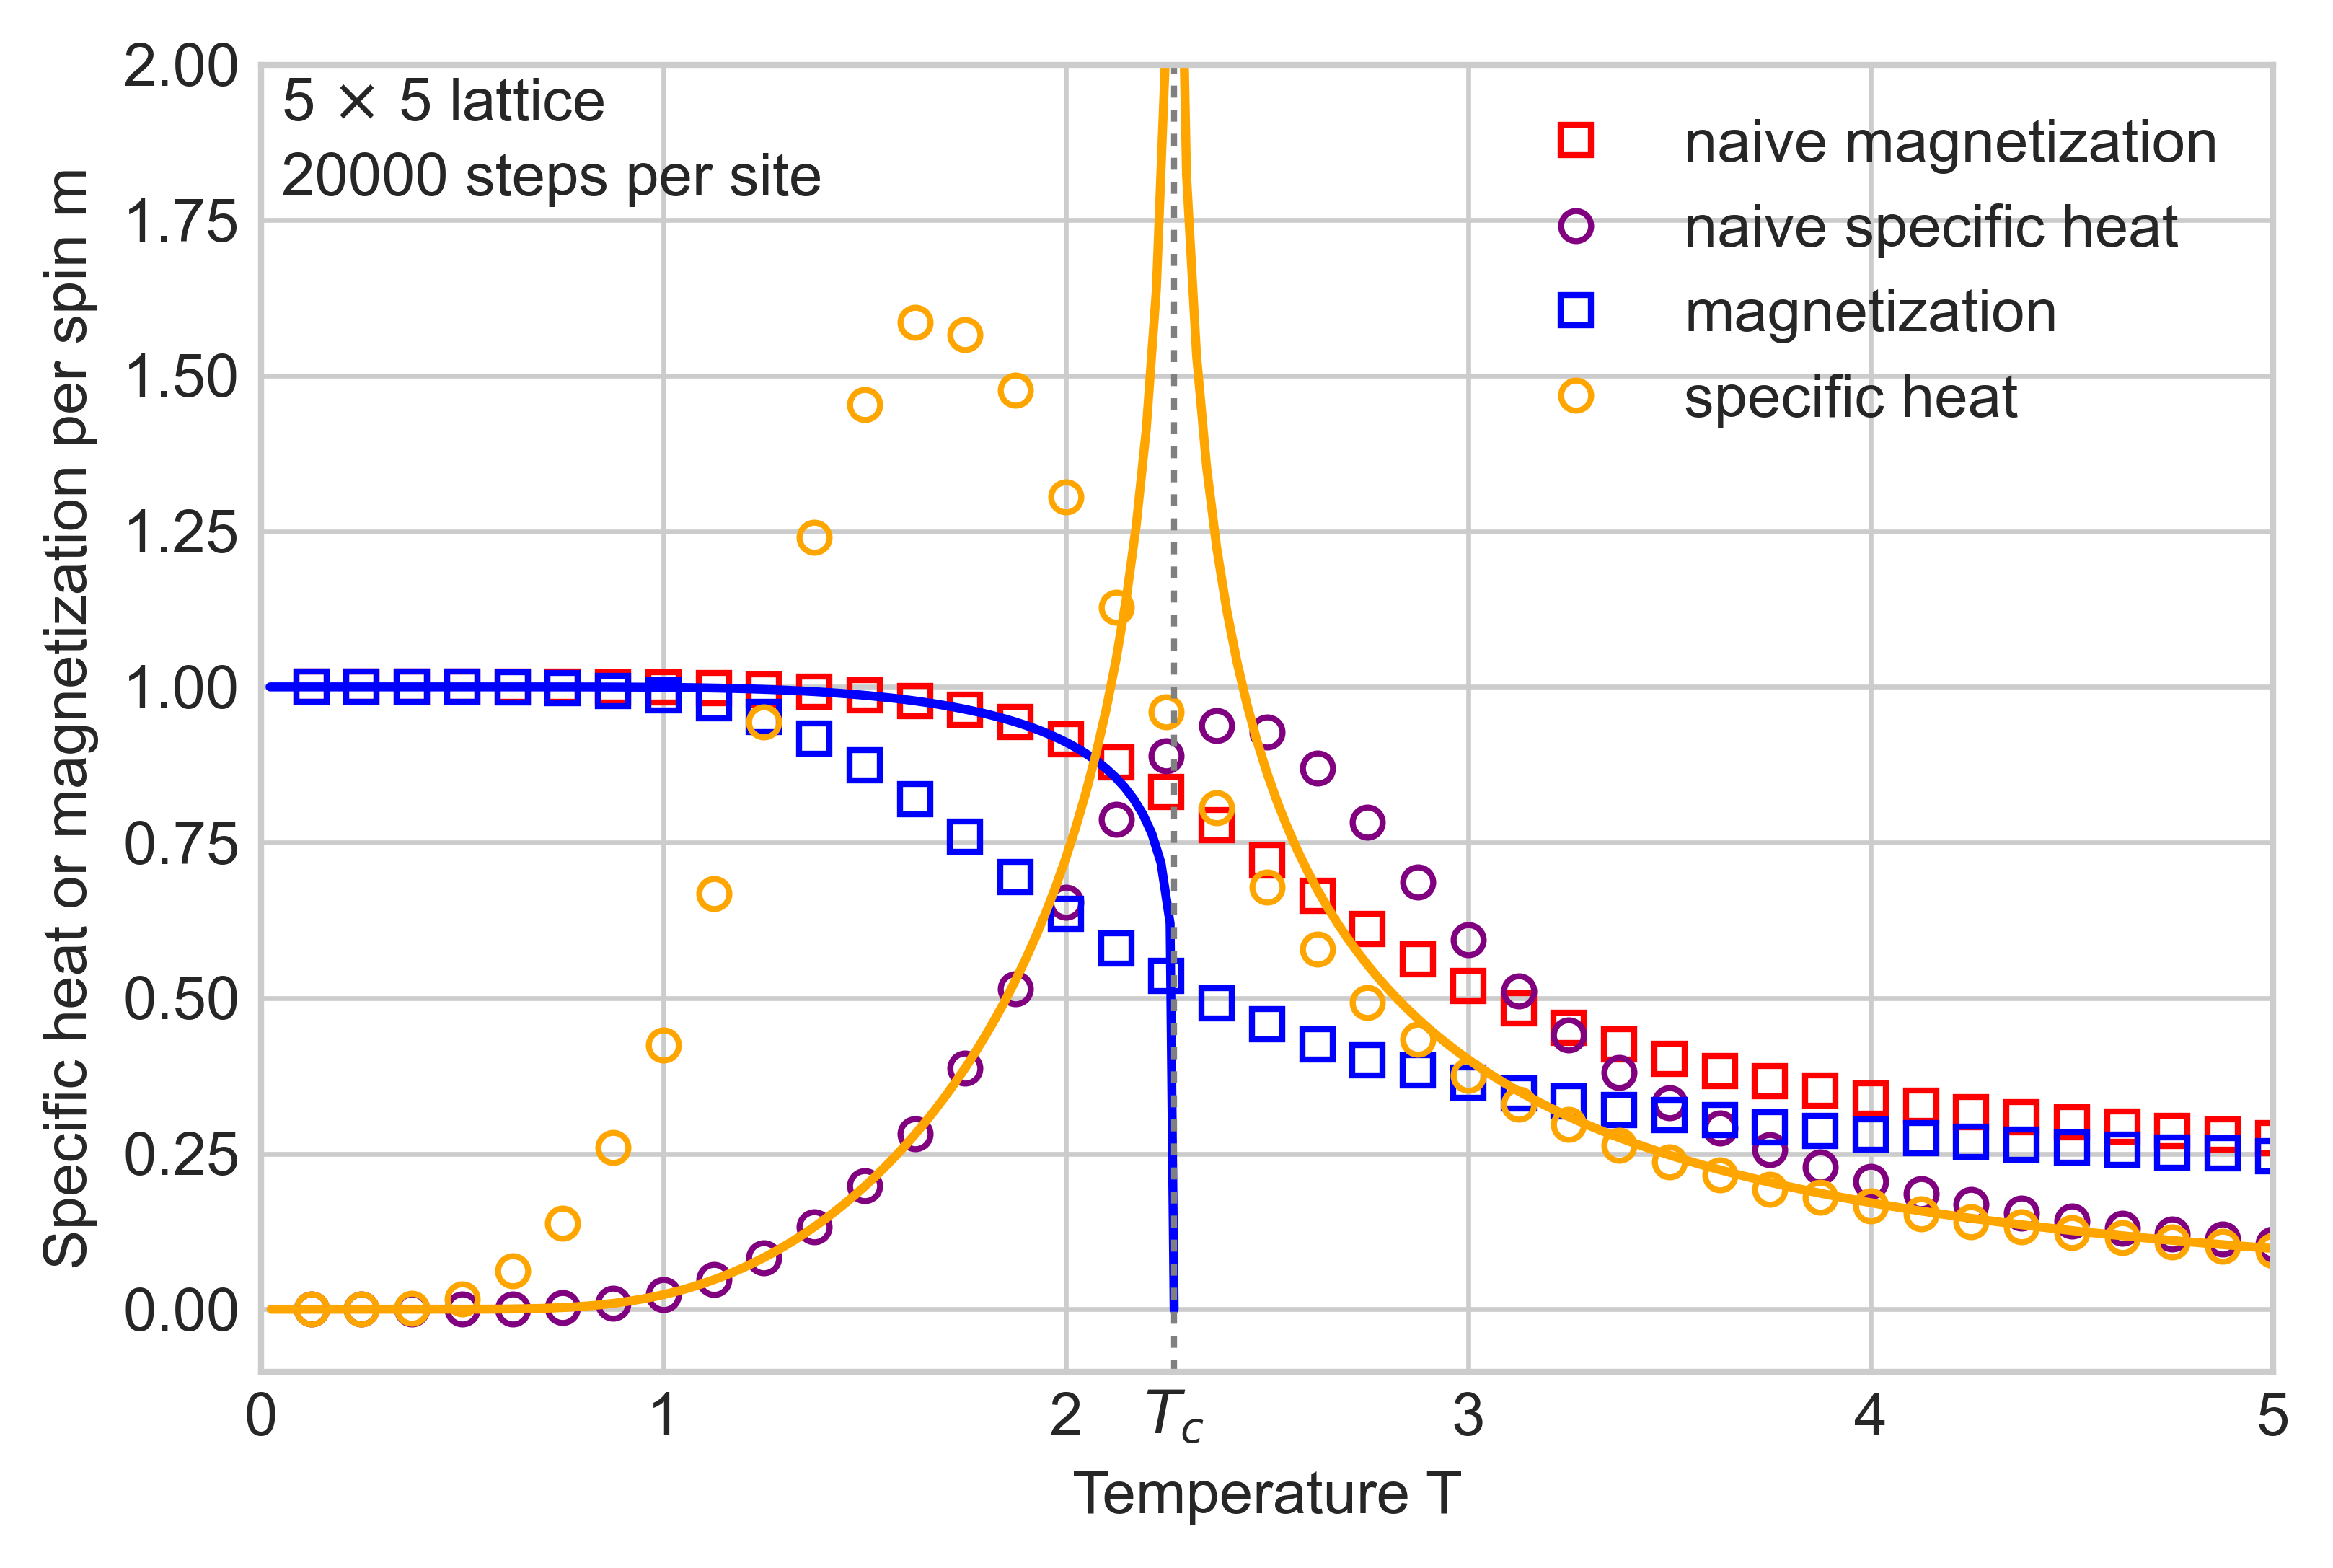

In [25]:
# Comparison
# a = pd.read_csv("../C++/Result/Reports/Metropolis_c_100_int25_4.csv")
# a = pd.read_csv("../C++/Result/Metropolis_c_5_int40_11.csv")
# a = pd.read_csv("../C++/SwendsenWang/Result/Comparison_ver_1/SwendsenWang_HK_c_5_int40_1.csv")
a = pd.read_csv("../../Project1/Long_range_cluster/Result/Cluster_LR_c_5_int40_mcs100000_a102.000000_Test__3.csv")

Data_5 = pd.read_csv("../C++/Result/Exact_Calculation/Exact_cpp_5_int40_1.csv")
Lattice2 = 100**2
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
# tau = np.array([1.,1,1.,1.,2.,1.,1.,1.,1.,2.125,88.125,185.875,25.875,10.,5.,3.,2.,1.,1.,1.,1.,1.,1.,1.,1.])
# M2error = np.sqrt(2*tau/(18000)*abs(a.iloc[:,5].values/Lattice2**2-(M2)**2))

plt.style.use('seaborn-whitegrid')
plt.figure(dpi=600)

plt.ylim(-0.1,2)
plt.xlim(0,5)

plt.plot(Data_5.iloc[:,1].values,Data_5.iloc[:,2].values,linestyle='', marker='s', markersize=5, color='red', label='naive magnetization',mfc='none')
plt.plot(Data_5.iloc[:,1].values,Data_5.iloc[:,3].values,linestyle='', marker='o', markersize=5, color='purple', label='naive specific heat',mfc='none')

plt.plot(T2,M2,linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
# plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')


plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')

plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"5 $\\times$ 5 lattice")
plt.text(0.05,1.79,"20000 steps per site")
plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

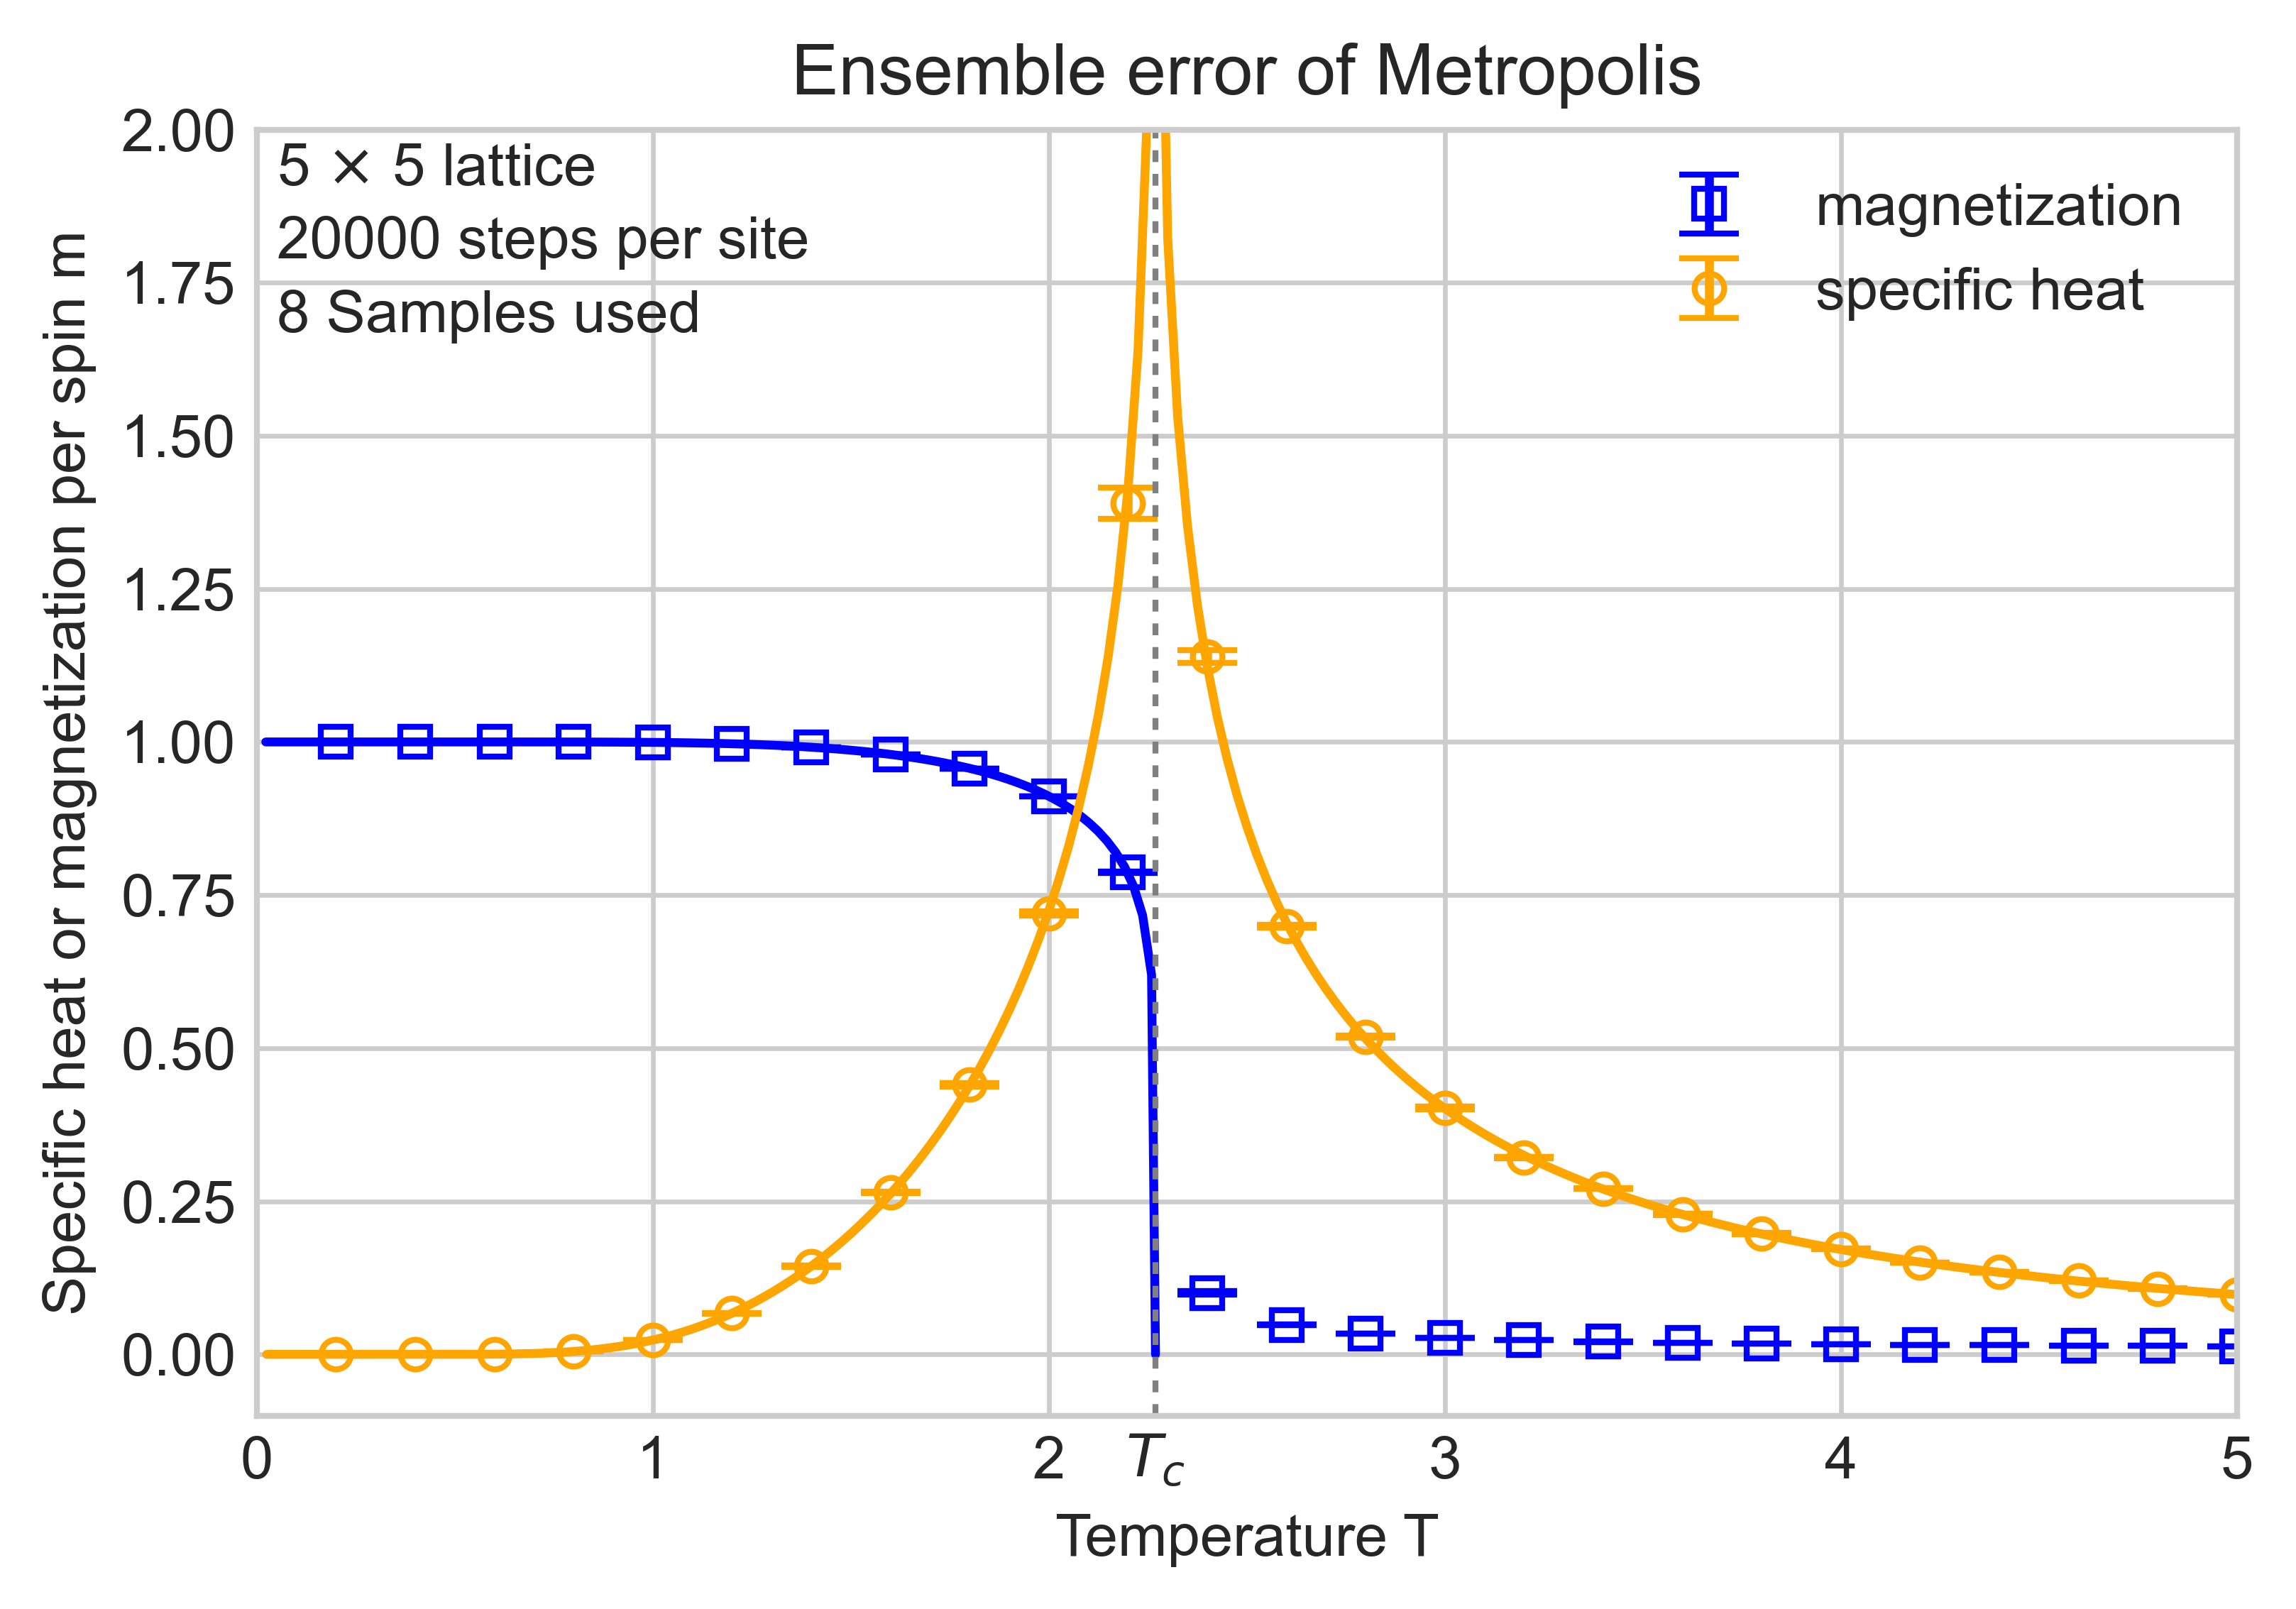

In [ ]:
# Merror with tau step
def ensemble_error_plot(num, path):
    Data = [pd.read_csv(path + "_" + str(i+1) +".csv") for i in range(num)]

    Lattice2 = 100**2
    T2 = Data[0].iloc[:,1].values
    M2 = np.array([Data[i].iloc[:,2].values for i in range(num)])
    # print(M_avg.shape)
    M_sqr = np.average(M2*M2,axis=0)
    M_avg = np.average(M2,axis=0)
    M_dev = np.sqrt((M_sqr-M_avg*M_avg)/num)

    C2 = np.array([Data[i].iloc[:,3].values for i in range(num)])
    # print(C2.shape)
    C_sqr = np.average(C2*C2,axis=0)
    C_avg = np.average(C2,axis=0)
    C_dev = np.sqrt((C_sqr-C_avg*C_avg)/num)
    # print(C_avg)
    # print(C_dev)
    
    plt.style.use('seaborn-whitegrid')
    plt.figure(dpi=600)

    plt.ylim(-0.1,2)
    plt.xlim(0,5)

    plt.errorbar(T2,M_avg,yerr=M_dev,linestyle='', marker='s', markersize=5, capsize=5 ,color='b', label='magnetization',mfc='none')
    plt.errorbar(T2,C_avg,yerr=C_dev,linestyle='', marker='o', markersize=5, capsize=5 ,color='orange', label='specific heat',mfc='none')

    plt.plot(ExactT,Exactm, color='b')
    plt.plot(ExactT2,ExactC, color='orange')

    plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
    plt.legend()
    plt.text(0.05,1.91,"5 $\\times$ 5 lattice")
    plt.text(0.05,1.79,"20000 steps per site")
    plt.text(0.05,1.67,"8 Samples used")
    plt.text(2.27, -0.2, '$T_c$', ha='center')

    plt.title("Ensemble error of Metropolis")
    plt.ylabel('Specific heat or magnetization per spin m')
    plt.xlabel('Temperature T')
    plt.show()

ensemble_error_plot(8,"../C++/Result/Metro_Ensemble/Metropolis_c_100_int25_ensemble")

In [ ]:
# # a = pd.read_csv("../C++/Result/Wolff_c_5_int25_1.csv")
# T2 = a.iloc[:,1].values
# M2 = a.iloc[:,2].values
# C2 = a.iloc[:,3].values
# M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/625-(a.iloc[:,4].values/25)**2))

# plt.style.use('seaborn-whitegrid')

# plt.ylim(-0.1,2)
# plt.xlim(0,5)
# plt.errorbar(T2,M2,M2error,linestyle='', marker='s', markersize=5, color='b', label='magnetization')
# plt.plot(T2,C2, linestyle='', marker='o', markersize=5, color='orange', label='specific heat')
# plt.plot(ExactT,Exactm, color='b')
# plt.plot(ExactT2,ExactC, color='orange')


# plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
# plt.legend()
# plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
# plt.text(0.05,1.79,"20000 steps per site")
# plt.text(2.27, -0.2, '$T_c$', ha='center')


# plt.ylabel('Specific heat or magnetization per spin m')
# plt.xlabel('Temperature T')
# plt.show()